#<center><b>  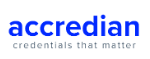

# <center><b> Data Science analysis on Employee Attrition - HR Advisory - Project<b></center>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Importing Libraries**](#Section3)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Handling Data Inconsistencies**](#Section5)<br>
  - **5.1** [**Missing values handling of Flag datatype fields - filed_complaint & recently_promoted**](#Section51)
  - **5.2** [**Dropping duplicate rows**](#Section52)
  - **5.3** [**Format error inconsistency handling in department field**](#Section53)
  - **5.4** [**Missing Values handling in "department", "recently_promoted", "satisfaction", "tenure" & "last_evaluation" fields**](#Section54)
  - **5.5** [**Merging databases**](#Section55)
  - **5.6** [**Data type conversion**](#Section56)
6. [**Uni-variate Analysis**](#Section6)<br>
7. [**Bi-variate Analysis**](#Section7)<br>
8. [**Data Preparation**](#Section8)<br>
9. [**ML Model Exploration**](#Section9)<br>
  - **9.1** [**Logistic Regression Trial**](#Section91)
  - **9.2** [**Decision Tree Trial**](#Section92)
  - **9.3** [**Random Forest Trial**](#Section93)
  - **9.3a** [**Random Forest Trial with Feature Selection**](#Section93a)
  - **9.4** [**Adaboost Trial**](#Section94)
  - **9.5** [**Gradientboost Trial**](#Section95)
  - **9.6** [**XGboost Trial**](#Section96)
10. [**Application on Production Data**](#Section10)<br>
---

---
<a name = Section1></a>
# **1. Introduction**
---

- Client for this project is the **HR Department** at a software company
- They want to try a new initiative to **retain employees**
- The idea is to use data to **predict whether an employee is likely to leave**
- Once these employees are identified, HR can be more proactive in reaching out to them before it's too late
- The priority is to deal with the data that is related to permanent employees
- In the current practice, once an employee leaves, he or she is taken an interview with the name “**exit interview**” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.
- This approach is too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer and the these insights can't be aggregated and interlaced across all employees who have left
- Also it gets too late by the time the proposed policy changes take effect

#<center><b>  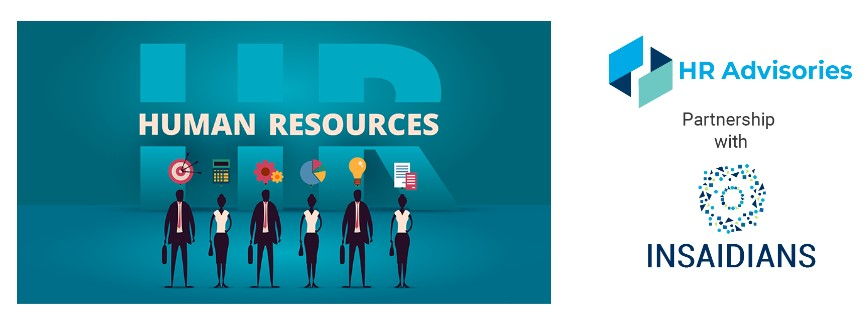

---
<a name = Section2></a>
# **2. Problem Statement**
---

- **HR Department** of a software company, who is the client for this study has hired data science consultants to understand better the **employee attrition in the company in advance** and take measures in early in retaining talents
- They want to supplement their exit interviews with a more **proactive approach**
- Datasets of past employees are made available for the study and their status whether still employed or already left
- Task is to build a best possible **classification model** using the datasets and currently there is no machine learning model available for this problem in the company **to predict whether an employee will stay or leave**
- **Target variable** will be the **Status** (**Employed/Left**) - **1 for the Left** and **0 for the Employed**

#<center><b> 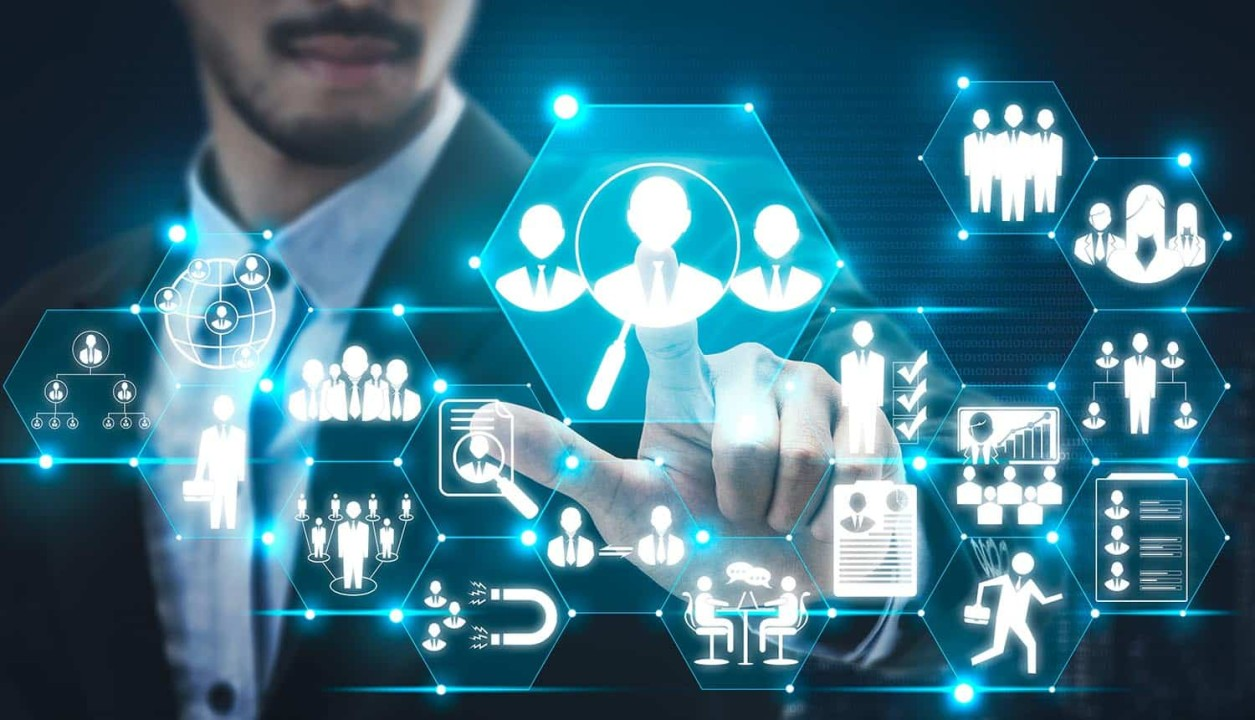

---
<a id = Section3></a>
# **3. Importing Libraries**
---

- This section is for importing the necessary libraries that will be required.

In [ ]:
import pandas as pd                                                	# Importing for panel data analysis
import numpy as np                                                  # Importing package numpys (For Numerical Python)
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
%matplotlib inline
import seaborn as sns                                               # Importing seaborm library for interactive visualization
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from yellowbrick.model_selection import FeatureImportances
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))

Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
numpy: 1.23.5
matplotlib: 3.7.1
pandas: 1.5.3


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This section involves accquiring the data and obtain some descriptive information out of it.

- Below details will provide a good idea about the features of the data set:

|Id|Feature|Description|
|:--|:--|:--|
|01| department (or) dept_id | Unique Department Code|
|02| dept_name           | Name of the Department|
|03| dept_head           | Name of the Head of the Department|
|04| employee_id         | Unique ID Number for each employee|
|05| age                 | Age of the employee|
|06| gender              | Gender of the employee|
|07| marital_status      | Marital Status of the employee|
|08| department          | Department to which the employees belong(ed) to|
|09| salary              | Salary level with respect to rest of their department|
|10| tenure              | Number of years at the company|
|11| recently_promoted   | Was the employee promoted in the last 3 years?|
|12| n_projects          | Number of projects employee has worked on|
|13| avg_monthly_hrs     | Average number of hours worked per month|
|14| satisfaction        | Score for employee’s satisfaction with the company (higher is better)|
|15| last_evaluation     | Score for most recent evaluation of employee (higher is better)|
|16| filed_complaint     | Has the employee filed a formal complaint in the last 3 years?|
|17| status              | Current employment status (Employed / Left)|

## **Dataset details**
-  Business Intelligence Analysts of the Company provided **three datasets** that contain information about past employees and their status (still employed or already left).
  - **department_data** - This dataset contains information about each department
  - **employee_details_data** - This dataset consists of Employee ID, their Age, Gender and Marital Status
  - **employee_data** - This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status
  

In [ ]:
!pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 kB 36.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.21.12 which is incompatible.


In [ ]:
import mysql.connector
mydb = mysql.connector.connect(
    host='cpanel.insaid.co',
    database='Capstone2',
    user='student',
    password='student')

In [ ]:
department_data = pd.read_sql_query("SELECT * from department_data", mydb )

<ipython-input-5-437d78e105e9>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  department_data = pd.read_sql_query("SELECT * from department_data", mydb )


In [ ]:
department_data

dept_id    dept_name              dept_head
0    D00-IT           IT             Henry Adey
1    D00-SS        Sales        Edward J Bayley
2    D00-TP         Temp        Micheal Zachrey
3   D00-ENG  Engineering  Sushant Raghunathan K
4    D00-SP      Support         Amelia Westray
5    D00-FN      Finance              Aanchal J
6    D00-PR  Procurement            Louie Viles
7    D00-AD        Admin          Evelyn Tolson
8    D00-MN   Management          Ellie Trafton
9    D00-MT    Marketing           Reuben Swann
10   D00-PD      Product          Darcy Staines

In [ ]:
department_data.shape

(11, 3)

In [ ]:
employee_details_data = pd.read_sql_query("SELECT * from employee_details_data", mydb )

<ipython-input-8-dc879aec26c8>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employee_details_data = pd.read_sql_query("SELECT * from employee_details_data", mydb )


In [ ]:
employee_details_data

employee_id  age  gender marital_status
0           113558   43    Male        Married
1           112256   24  Female      Unmarried
2           112586   22  Female      Unmarried
3           108071   36    Male        Married
4           116915   38    Male        Married
...            ...  ...     ...            ...
14240       111781   26    Male      Unmarried
14241       100372   35    Male        Married
14242       128083   30  Female        Married
14243       118487   24    Male      Unmarried
14244       118849   39    Male        Married

[14245 rows x 4 columns]

In [ ]:
employee_data = pd.read_sql_query("SELECT * from employee_data", mydb )

<ipython-input-10-42e36a2a12bd>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employee_data = pd.read_sql_query("SELECT * from employee_data", mydb )


In [ ]:
employee_data

avg_monthly_hrs department  filed_complaint  last_evaluation  \
0                246.0       None              NaN         0.866838   
1                134.0       None              NaN         0.555718   
2                156.0     D00-SS              1.0         0.474082   
3                256.0     D00-SP              NaN         0.961360   
4                146.0     D00-SS              NaN         0.507349   
...                ...        ...              ...              ...   
14145            245.0     D00-SS              NaN         0.850785   
14146            192.0     D00-SS              NaN         0.951901   
14147            175.0     D00-MN              NaN         0.854538   
14148            268.0     D00-MT              NaN         0.900887   
14149            268.0     D00-IT              1.0         0.897098   

       n_projects  recently_promoted  salary  satisfaction    status  tenure  \
0               6                NaN  medium      0.134415      Left     4.0   
1               2                NaN     low      0.511041      Left     3.0   
2               2                NaN  medium      0.405101      Left     3.0   
3               6                NaN     low      0.152974      Left     4.0   
4               2                NaN  medium      0.434845      Left     3.0   
...           ...                ...     ...           ...       ...     ...   
14145           6                NaN  medium      0.225084  Employed     5.0   
14146           3                NaN  medium      0.539834  Employed     3.0   
14147           4                NaN  medium      0.934465  Employed     3.0   
14148           5                NaN  medium      0.906613      Left     5.0   
14149           2                NaN     low      0.459371  Employed     4.0   

       employee_id  
0           124467  
1           112210  
2           126150  
3           125346  
4           113707  
...            ...  
14145       101809  
14146       116153  
14147       119780  
14148       115325  
14149       112312  

[14150 rows x 11 columns]

In [ ]:
department_data.to_csv('department_data.csv')
employee_details_data.to_csv('employee_details_data.csv')
employee_data.to_csv('employee_data.csv')

**Keeping Safe copy of datasets**

In [ ]:
safecopy_department_data = department_data.copy()
safecopy_employee_details_data = employee_details_data.copy()
safecopy_employee_data = employee_data.copy()

**Retrieving copy, if some errors are made to original file**

In [ ]:
department_data = safecopy_department_data.copy()
employee_details_data = safecopy_employee_details_data.copy()
employee_data = safecopy_employee_data.copy()

In [ ]:
department_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [ ]:
employee_details_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [ ]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [ ]:
employee_details_data.nunique()

employee_id       14245
age                  36
gender                2
marital_status        2
dtype: int64

In [ ]:
employee_details_data['gender'].value_counts()

Male      9382
Female    4863
Name: gender, dtype: int64

In [ ]:
employee_details_data['marital_status'].value_counts()

Unmarried    7283
Married      6962
Name: marital_status, dtype: int64

In [ ]:
employee_details_data['employee_id'].value_counts()

113558    1
105958    1
102997    1
110185    1
118385    1
         ..
107064    1
115991    1
119377    1
109889    1
118849    1
Name: employee_id, Length: 14245, dtype: int64

In [ ]:
employee_details_data['age'].value_counts().sort_index()

22    1175
23    1209
24    1319
25    1255
26     633
27     674
28     651
29     669
30     275
31     228
32     281
33     280
34     247
35     264
36     271
37     285
38     270
39     275
40     273
41     270
42     306
43     265
44     252
45     266
46     277
47     281
48     274
49     244
50     236
51     228
52     254
53     236
54     227
55      38
56      23
57      34
Name: age, dtype: int64

In [ ]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [ ]:
employee_data.nunique()

avg_monthly_hrs        249
department              12
filed_complaint          1
last_evaluation      12188
n_projects               7
recently_promoted        1
salary                   3
satisfaction         13497
status                   2
tenure                   8
employee_id          14117
dtype: int64

In [ ]:
department_data.nunique()

dept_id      11
dept_name    11
dept_head    11
dtype: int64

In [ ]:
department_data['dept_id'].value_counts()

D00-IT     1
D00-SS     1
D00-TP     1
D00-ENG    1
D00-SP     1
D00-FN     1
D00-PR     1
D00-AD     1
D00-MN     1
D00-MT     1
D00-PD     1
Name: dept_id, dtype: int64

In [ ]:
employee_data['department'].value_counts()

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1157
D00-PD      855
D00-MT      815
D00-FN      725
D00-MN      593
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [ ]:
employee_data['filed_complaint'].value_counts()

1.0    2046
Name: filed_complaint, dtype: int64

In [ ]:
employee_data['last_evaluation'].value_counts().sort_index()

0.316175      1
0.317279      1
0.320953      1
0.322828      1
0.324239      1
           ... 
0.999259      1
0.999365      1
0.999390      1
0.999808      1
1.000000    358
Name: last_evaluation, Length: 12188, dtype: int64

In [ ]:
employee_data['n_projects'].value_counts().sort_index()

1      61
2    2327
3    3798
4    4051
5    2571
6    1099
7     243
Name: n_projects, dtype: int64

In [ ]:
employee_data['recently_promoted'].value_counts()

1.0    297
Name: recently_promoted, dtype: int64

In [ ]:
employee_data['salary'].value_counts()

low       6906
medium    6101
high      1143
Name: salary, dtype: int64

In [ ]:
employee_data['status'].value_counts()

Employed    10784
Left         3366
Name: status, dtype: int64

In [ ]:
employee_data['satisfaction'].value_counts().sort_index()

0.040058      1
0.040191      1
0.040477      1
0.041302      1
0.042408      1
           ... 
0.999593      1
0.999704      1
0.999763      1
0.999880      1
1.000000    357
Name: satisfaction, Length: 13497, dtype: int64

In [ ]:
employee_data['tenure'].value_counts().sort_index()

2.0     3023
3.0     6018
4.0     2394
5.0     1369
6.0      660
7.0      180
8.0      155
10.0     201
Name: tenure, dtype: int64

In [ ]:
employee_data.isna().sum()

avg_monthly_hrs          0
department             707
filed_complaint      12104
last_evaluation       1487
n_projects               0
recently_promoted    13853
salary                   0
satisfaction           150
status                   0
tenure                 150
employee_id              0
dtype: int64

In [ ]:
missing_satisfaction = employee_data[employee_data.filter(like='satisfaction').isnull().any(1)]

<ipython-input-37-f4e7133df317>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  missing_satisfaction = employee_data[employee_data.filter(like='satisfaction').isnull().any(1)]


In [ ]:
missing_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 44 to 13960
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    150 non-null    float64
 1   department         150 non-null    object 
 2   filed_complaint    29 non-null     float64
 3   last_evaluation    0 non-null      float64
 4   n_projects         150 non-null    int64  
 5   recently_promoted  0 non-null      float64
 6   salary             150 non-null    object 
 7   satisfaction       0 non-null      float64
 8   status             150 non-null    object 
 9   tenure             0 non-null      float64
 10  employee_id        150 non-null    int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 14.1+ KB


In [ ]:
missing_satisfaction['tenure'].value_counts()

Series([], Name: tenure, dtype: int64)

In [ ]:
missing_satisfaction

avg_monthly_hrs department  filed_complaint  last_evaluation  \
44               125.0     D00-TP              NaN              NaN   
245              124.0     D00-TP              NaN              NaN   
251              119.0     D00-TP              NaN              NaN   
414              126.0     D00-TP              NaN              NaN   
468               65.0     D00-TP              NaN              NaN   
...                ...        ...              ...              ...   
13741            122.0     D00-TP              NaN              NaN   
13774             49.0     D00-TP              NaN              NaN   
13841             97.0     D00-TP              1.0              NaN   
13905            132.0     D00-TP              NaN              NaN   
13960            116.0     D00-TP              NaN              NaN   

       n_projects  recently_promoted  salary  satisfaction    status  tenure  \
44              3                NaN  medium           NaN      Left     NaN   
245             3                NaN     low           NaN      Left     NaN   
251             2                NaN  medium           NaN      Left     NaN   
414             2                NaN     low           NaN      Left     NaN   
468             1                NaN    high           NaN      Left     NaN   
...           ...                ...     ...           ...       ...     ...   
13741           2                NaN  medium           NaN  Employed     NaN   
13774           2                NaN     low           NaN  Employed     NaN   
13841           1                NaN  medium           NaN  Employed     NaN   
13905           2                NaN  medium           NaN      Left     NaN   
13960           2                NaN     low           NaN  Employed     NaN   

       employee_id  
44          120360  
245         116012  
251         116287  
414         115235  
468         122769  
...            ...  
13741       111990  
13774       148021  
13841       116171  
13905       106482  
13960       105231  

[150 rows x 11 columns]

In [ ]:
missing_satisfaction['department'].value_counts()

D00-TP    150
Name: department, dtype: int64

In [ ]:
missing_satisfaction['recently_promoted'].value_counts()

Series([], Name: recently_promoted, dtype: int64)

In [ ]:
employee_data.employee_id.duplicated().value_counts()

False    14117
True        33
Name: employee_id, dtype: int64

In [ ]:
employee_data.duplicated().sum()

29

In [ ]:
employee_data['employee_id'].value_counts().sort_values(ascending=False)

0         5
110546    2
109804    2
112373    2
116153    2
         ..
112565    1
114405    1
117068    1
104196    1
104996    1
Name: employee_id, Length: 14117, dtype: int64

In [ ]:
duplicate_empid = employee_data[employee_data['employee_id'].duplicated()]

In [ ]:
employee_data[employee_data['employee_id']==110546]

avg_monthly_hrs department  filed_complaint  last_evaluation  \
6827             208.0     D00-FN              NaN         0.699756   
14126            208.0     D00-FN              NaN         0.699756   

       n_projects  recently_promoted salary  satisfaction    status  tenure  \
6827            4                NaN    low      0.476216  Employed     5.0   
14126           4                NaN    low      0.476216  Employed     5.0   

       employee_id  
6827        110546  
14126       110546

In [ ]:
duplicate_empid

avg_monthly_hrs department  filed_complaint  last_evaluation  \
304              264.0    D00-ENG              NaN         0.774554   
1234             129.0     D00-SP              NaN         0.402660   
11304            167.0       None              NaN         0.880053   
12304            259.0    D00-ENG              NaN         0.505883   
14121            265.0     D00-MN              1.0         0.825672   
14122            282.0     D00-SS              NaN         0.875427   
14123            206.0     D00-SS              NaN         1.000000   
14124            161.0     D00-IT              NaN         0.715893   
14125            163.0     D00-SP              NaN         0.486176   
14126            208.0     D00-FN              NaN         0.699756   
14127            152.0     D00-MT              NaN         0.510016   
14128            307.0     D00-IT              NaN         0.905708   
14129            212.0     D00-PD              NaN         0.773018   
14130            148.0     D00-MN              NaN         0.577112   
14131            184.0     D00-MT              NaN         0.639866   
14132            132.0     D00-PD              NaN         1.000000   
14133            168.0     D00-SP              NaN         0.747792   
14134            161.0     D00-SS              NaN         0.483513   
14135            136.0     D00-SS              NaN         0.645563   
14136            261.0     D00-IT              1.0         0.465430   
14137            181.0     D00-SS              1.0         0.703796   
14138            142.0     D00-SP              1.0         0.400566   
14139            135.0     D00-SP              NaN         0.504764   
14140            133.0     D00-SS              NaN         0.986741   
14141            224.0     D00-FN              NaN         0.877647   
14142            233.0     D00-IT              NaN         0.940863   
14143            141.0     D00-FN              NaN         0.801055   
14144            238.0     D00-SS              NaN         0.958633   
14145            245.0     D00-SS              NaN         0.850785   
14146            192.0     D00-SS              NaN         0.951901   
14147            175.0     D00-MN              NaN         0.854538   
14148            268.0     D00-MT              NaN         0.900887   
14149            268.0     D00-IT              1.0         0.897098   

       n_projects  recently_promoted  salary  satisfaction    status  tenure  \
304             6                NaN     low      0.110974      Left     4.0   
1234            2                NaN  medium      0.437359      Left     3.0   
11304           5                NaN     low      0.682140  Employed     3.0   
12304           5                NaN     low      0.631046  Employed     4.0   
14121           3                NaN     low      0.545978  Employed    10.0   
14122           6                NaN     low      0.065908      Left     4.0   
14123           6                NaN  medium      0.783548      Left     5.0   
14124           6                NaN  medium      0.867768      Left     4.0   
14125           3                NaN  medium      0.832118  Employed     3.0   
14126           4                NaN     low      0.476216  Employed     5.0   
14127           3                NaN     low      0.826531  Employed     2.0   
14128           7                NaN     low      0.125275      Left     4.0   
14129           4                NaN  medium      0.829316  Employed     2.0   
14130           3                NaN    high      0.481001  Employed    10.0   
14131           5                NaN  medium      0.504388  Employed     4.0   
14132           4                NaN  medium      1.000000  Employed     2.0   
14133           2                NaN     low      0.869815  Employed     3.0   
14134           2                NaN     low      0.416761      Left     3.0   
14135           4                NaN    high      0.664039  Employed    

In [ ]:
duplicate_empid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 304 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    33 non-null     float64
 1   department         32 non-null     object 
 2   filed_complaint    5 non-null      float64
 3   last_evaluation    33 non-null     float64
 4   n_projects         33 non-null     int64  
 5   recently_promoted  0 non-null      float64
 6   salary             33 non-null     object 
 7   satisfaction       33 non-null     float64
 8   status             33 non-null     object 
 9   tenure             33 non-null     float64
 10  employee_id        33 non-null     int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.1+ KB


In [ ]:
duplicate_empid.sort_values(by='employee_id', ascending=False)

avg_monthly_hrs department  filed_complaint  last_evaluation  \
14134            161.0     D00-SS              NaN         0.483513   
14147            175.0     D00-MN              NaN         0.854538   
14131            184.0     D00-MT              NaN         0.639866   
14129            212.0     D00-PD              NaN         0.773018   
14133            168.0     D00-SP              NaN         0.747792   
14139            135.0     D00-SP              NaN         0.504764   
14122            282.0     D00-SS              NaN         0.875427   
14137            181.0     D00-SS              1.0         0.703796   
14146            192.0     D00-SS              NaN         0.951901   
14125            163.0     D00-SP              NaN         0.486176   
14148            268.0     D00-MT              NaN         0.900887   
14121            265.0     D00-MN              1.0         0.825672   
14149            268.0     D00-IT              1.0         0.897098   
14123            206.0     D00-SS              NaN         1.000000   
14127            152.0     D00-MT              NaN         0.510016   
14128            307.0     D00-IT              NaN         0.905708   
14126            208.0     D00-FN              NaN         0.699756   
14141            224.0     D00-FN              NaN         0.877647   
14136            261.0     D00-IT              1.0         0.465430   
14130            148.0     D00-MN              NaN         0.577112   
14143            141.0     D00-FN              NaN         0.801055   
14142            233.0     D00-IT              NaN         0.940863   
14144            238.0     D00-SS              NaN         0.958633   
14124            161.0     D00-IT              NaN         0.715893   
14132            132.0     D00-PD              NaN         1.000000   
14138            142.0     D00-SP              1.0         0.400566   
14135            136.0     D00-SS              NaN         0.645563   
14140            133.0     D00-SS              NaN         0.986741   
14145            245.0     D00-SS              NaN         0.850785   
1234             129.0     D00-SP              NaN         0.402660   
12304            259.0    D00-ENG              NaN         0.505883   
11304            167.0       None              NaN         0.880053   
304              264.0    D00-ENG              NaN         0.774554   

       n_projects  recently_promoted  salary  satisfaction    status  tenure  \
14134           2                NaN     low      0.416761      Left     3.0   
14147           4                NaN  medium      0.934465  Employed     3.0   
14131           5                NaN  medium      0.504388  Employed     4.0   
14129           4                NaN  medium      0.829316  Employed     2.0   
14133           2                NaN     low      0.869815  Employed     3.0   
14139           2                NaN     low      0.500691      Left     3.0   
14122           6                NaN     low      0.065908      Left     4.0   
14137           3                NaN  medium      0.870014  Employed     3.0   
14146           3                NaN  medium      0.539834  Employed     3.0   
14125           3                NaN  medium      0.832118  Employed     3.0   
14148           5                NaN  medium      0.906613      Left     5.0   
14121           3                NaN     low      0.545978  Employed    10.0   
14149           2                NaN     low      0.459371  Employed     4.0   
14123           6                NaN  medium      0.783548      Left     5.0   
14127           3                NaN     low      0.826531  Employed     2.0   
14128           7                NaN     low      0.125275      Left     4.0   
14126           4                NaN     low      0.476216  Employed     5.0   
14141           3                NaN  medium      0.555114  Employed     3.0   
14136           5                NaN     low      0.341498  Employed    

##**Observations**
From Data Description and Data Information analysis, the following are observed:
- data is provided as 3 datasets with "**employee_id**" as a common field among two datasets and "**dept_id**" as a linking field for mapping further with 3rd dataset
  - need to **merge all 3 datasets** after handling data inconsistencies
- **14150 rows of data and 16 unique columns**
- "**status**" to be predicted
- **Missing values** observed in the following **6 fields**:
  - department, filed_complaint, last_evaluation, recently_promoted, satisfaction, tenure
  - **filed_complaint** & **recently_promoted** missing values could be filled with "0"
- **Data inconsistency** observed in the following fields:
  - **department** - Need to handle format error with 207 rows with values "-IT"
- **Duplicate values** observed (29 rows) need to be dropped
- **150 rows** where there are no entries for the 4 fields - last_evaluation, recently_promoted, satisfaction and tenure; but all of them belong to one department - "D00-TP" interestingly
- could **drop "dept_head", "dept_name" fields**, if required, as it may not add value for model development
- **Categorical Variables** - **7 fields**: dept_id, dept_name, dept_head, gender, marital_status, salary, status
- **Continuous Variables** - **9 fields** employee_id, age, avg_monthly_hrs, filed_complaint, last_evaluation, n_projects, recently_promoted, satisfaction, tenure
  - Following are **Flag datatypes** - filed_complaint,recently_promoted

---
<a name = Section5></a>
# **5. Handling Data Inconsistencies**
---

<a name = Section51></a>
### **5.1 Missing values handling of Flag datatype fields - filed_complaint & recently_promoted**

In [ ]:
employee_data['filed_complaint'] = np.where(employee_data['filed_complaint'].isna(),0.0,employee_data['filed_complaint'])

In [ ]:
employee_data['recently_promoted'] = np.where(employee_data['recently_promoted'].isna(),0.0,employee_data['recently_promoted'])

In [ ]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    14150 non-null  float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  14150 non-null  float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [ ]:
employee_data

avg_monthly_hrs department  filed_complaint  last_evaluation  \
0                246.0       None              0.0         0.866838   
1                134.0       None              0.0         0.555718   
2                156.0     D00-SS              1.0         0.474082   
3                256.0     D00-SP              0.0         0.961360   
4                146.0     D00-SS              0.0         0.507349   
...                ...        ...              ...              ...   
14145            245.0     D00-SS              0.0         0.850785   
14146            192.0     D00-SS              0.0         0.951901   
14147            175.0     D00-MN              0.0         0.854538   
14148            268.0     D00-MT              0.0         0.900887   
14149            268.0     D00-IT              1.0         0.897098   

       n_projects  recently_promoted  salary  satisfaction    status  tenure  \
0               6                0.0  medium      0.134415      Left     4.0   
1               2                0.0     low      0.511041      Left     3.0   
2               2                0.0  medium      0.405101      Left     3.0   
3               6                0.0     low      0.152974      Left     4.0   
4               2                0.0  medium      0.434845      Left     3.0   
...           ...                ...     ...           ...       ...     ...   
14145           6                0.0  medium      0.225084  Employed     5.0   
14146           3                0.0  medium      0.539834  Employed     3.0   
14147           4                0.0  medium      0.934465  Employed     3.0   
14148           5                0.0  medium      0.906613      Left     5.0   
14149           2                0.0     low      0.459371  Employed     4.0   

       employee_id  
0           124467  
1           112210  
2           126150  
3           125346  
4           113707  
...            ...  
14145       101809  
14146       116153  
14147       119780  
14148       115325  
14149       112312  

[14150 rows x 11 columns]

In [ ]:
employee_data['filed_complaint'].value_counts()

0.0    12104
1.0     2046
Name: filed_complaint, dtype: int64

In [ ]:
employee_data['recently_promoted'].value_counts()

0.0    13853
1.0      297
Name: recently_promoted, dtype: int64

<a name = Section52></a>
### **5.2.Dropping duplicate rows**

In [ ]:
employee_data.drop_duplicates(inplace=True)

In [ ]:
employee_data.duplicated().sum()

0

In [ ]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14121 entries, 0 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14121 non-null  float64
 1   department         13414 non-null  object 
 2   filed_complaint    14121 non-null  float64
 3   last_evaluation    12634 non-null  float64
 4   n_projects         14121 non-null  int64  
 5   recently_promoted  14121 non-null  float64
 6   salary             14121 non-null  object 
 7   satisfaction       13971 non-null  float64
 8   status             14121 non-null  object 
 9   tenure             13971 non-null  float64
 10  employee_id        14121 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.3+ MB


<a name = Section53></a>
### **5.3.Format error inconsistency handling in department field**

In [ ]:
employee_data['department'].value_counts()

D00-SS     3896
D00-ENG    2575
D00-SP     2109
D00-IT     1152
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [ ]:
employee_data['department'].replace('-IT','D00-IT', inplace=True)

In [ ]:
employee_data['department'].value_counts()

D00-SS     3896
D00-ENG    2575
D00-SP     2109
D00-IT     1359
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [ ]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14121 entries, 0 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14121 non-null  float64
 1   department         13414 non-null  object 
 2   filed_complaint    14121 non-null  float64
 3   last_evaluation    12634 non-null  float64
 4   n_projects         14121 non-null  int64  
 5   recently_promoted  14121 non-null  float64
 6   salary             14121 non-null  object 
 7   satisfaction       13971 non-null  float64
 8   status             14121 non-null  object 
 9   tenure             13971 non-null  float64
 10  employee_id        14121 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.3+ MB


<a name = Section54></a>
### **5.4.Missing Values handling in "department", "recently_promoted", "satisfaction", "tenure" & "last_evaluation" fields**

- here using a pre-defined function, which fill missing values based on probability

In [ ]:
employee_data.isna().sum()

avg_monthly_hrs         0
department            707
filed_complaint         0
last_evaluation      1487
n_projects              0
recently_promoted       0
salary                  0
satisfaction          150
status                  0
tenure                150
employee_id             0
dtype: int64

In [ ]:
def random_cat(column):
    category_counts = column.dropna().value_counts()
    categories = category_counts.index.tolist()
    probabilities = category_counts / category_counts.sum()
    random_indices = np.random.choice(len(categories), size=column.isnull().sum(), p=probabilities)
    random_categories = [categories[i] for i in random_indices]
    column[column.isnull()] = random_categories
    return column

In [ ]:
random_cat(employee_data['department'])
random_cat(employee_data['last_evaluation'])
random_cat(employee_data['satisfaction'])
random_cat(employee_data['tenure'])

<ipython-input-65-b8943bba0c8e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column.isnull()] = random_categories
<ipython-input-65-b8943bba0c8e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column.isnull()] = random_categories
<ipython-input-65-b8943bba0c8e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column.isnull()] = random_categories
<ipython-input-65-b8943bba0c8e>:7: SettingWithCopyWarning: 
A va

0        4.0
1        3.0
2        3.0
3        4.0
4        3.0
        ... 
14116    3.0
14117    3.0
14118    3.0
14119    2.0
14120    3.0
Name: tenure, Length: 14121, dtype: float64

In [ ]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14121 entries, 0 to 14120
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14121 non-null  float64
 1   department         14121 non-null  object 
 2   filed_complaint    14121 non-null  float64
 3   last_evaluation    14121 non-null  float64
 4   n_projects         14121 non-null  int64  
 5   recently_promoted  14121 non-null  float64
 6   salary             14121 non-null  object 
 7   satisfaction       14121 non-null  float64
 8   status             14121 non-null  object 
 9   tenure             14121 non-null  float64
 10  employee_id        14121 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.3+ MB


<a name = Section55></a>
### **5.5.Merging Databases**

In [ ]:
department_data

dept_id    dept_name              dept_head
0    D00-IT           IT             Henry Adey
1    D00-SS        Sales        Edward J Bayley
2    D00-TP         Temp        Micheal Zachrey
3   D00-ENG  Engineering  Sushant Raghunathan K
4    D00-SP      Support         Amelia Westray
5    D00-FN      Finance              Aanchal J
6    D00-PR  Procurement            Louie Viles
7    D00-AD        Admin          Evelyn Tolson
8    D00-MN   Management          Ellie Trafton
9    D00-MT    Marketing           Reuben Swann
10   D00-PD      Product          Darcy Staines

In [ ]:
employee_details_data

employee_id  age  gender marital_status
0           113558   43    Male        Married
1           112256   24  Female      Unmarried
2           112586   22  Female      Unmarried
3           108071   36    Male        Married
4           116915   38    Male        Married
...            ...  ...     ...            ...
14240       111781   26    Male      Unmarried
14241       100372   35    Male        Married
14242       128083   30  Female        Married
14243       118487   24    Male      Unmarried
14244       118849   39    Male        Married

[14245 rows x 4 columns]

In [ ]:
employee_data

avg_monthly_hrs department  filed_complaint  last_evaluation  \
0                246.0     D00-SS              0.0         0.866838   
1                134.0     D00-FN              0.0         0.555718   
2                156.0     D00-SS              1.0         0.474082   
3                256.0     D00-SP              0.0         0.961360   
4                146.0     D00-SS              0.0         0.507349   
...                ...        ...              ...              ...   
14116            141.0     D00-SS              0.0         0.537866   
14117            168.0     D00-SS              0.0         0.643553   
14118            257.0     D00-SP              0.0         0.834400   
14119            242.0     D00-IT              0.0         0.836603   
14120            171.0     D00-SP              1.0         0.907277   

       n_projects  recently_promoted  salary  satisfaction    status  tenure  \
0               6                0.0  medium      0.134415      Left     4.0   
1               2                0.0     low      0.511041      Left     3.0   
2               2                0.0  medium      0.405101      Left     3.0   
3               6                0.0     low      0.152974      Left     4.0   
4               2                0.0  medium      0.434845      Left     3.0   
...           ...                ...     ...           ...       ...     ...   
14116           3                0.0     low      0.610841  Employed     3.0   
14117           3                0.0     low      0.489559  Employed     3.0   
14118           3                0.0  medium      0.944942  Employed     3.0   
14119           4                0.0     low      0.740136  Employed     2.0   
14120           3                0.0     low      0.506658  Employed     3.0   

       employee_id  
0           124467  
1           112210  
2           126150  
3           125346  
4           113707  
...            ...  
14116       100833  
14117       118090  
14118       106064  
14119       113083  
14120       104996  

[14121 rows x 11 columns]

In [ ]:
merge1 = pd.merge(employee_data,employee_details_data, on='employee_id' )

In [ ]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14116 non-null  float64
 1   department         14116 non-null  object 
 2   filed_complaint    14116 non-null  float64
 3   last_evaluation    14116 non-null  float64
 4   n_projects         14116 non-null  int64  
 5   recently_promoted  14116 non-null  float64
 6   salary             14116 non-null  object 
 7   satisfaction       14116 non-null  float64
 8   status             14116 non-null  object 
 9   tenure             14116 non-null  float64
 10  employee_id        14116 non-null  int64  
 11  age                14116 non-null  int64  
 12  gender             14116 non-null  object 
 13  marital_status     14116 non-null  object 
dtypes: float64(6), int64(3), object(5)
memory usage: 1.6+ MB


In [ ]:
merge1['department'].value_counts()

D00-SS     4099
D00-ENG    2712
D00-SP     2208
D00-IT     1433
D00-PD      899
D00-MT      859
D00-FN      768
D00-MN      621
D00-AD      180
D00-PR      180
D00-TP      157
Name: department, dtype: int64

In [ ]:
department_data = department_data.rename(columns = {'dept_id':'department'})

In [ ]:
final_merge = pd.merge(merge1,department_data, on='department' )

In [ ]:
final_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14116 non-null  float64
 1   department         14116 non-null  object 
 2   filed_complaint    14116 non-null  float64
 3   last_evaluation    14116 non-null  float64
 4   n_projects         14116 non-null  int64  
 5   recently_promoted  14116 non-null  float64
 6   salary             14116 non-null  object 
 7   satisfaction       14116 non-null  float64
 8   status             14116 non-null  object 
 9   tenure             14116 non-null  float64
 10  employee_id        14116 non-null  int64  
 11  age                14116 non-null  int64  
 12  gender             14116 non-null  object 
 13  marital_status     14116 non-null  object 
 14  dept_name          14116 non-null  object 
 15  dept_head          14116 non-null  object 
dtypes: float64(6), int64(3

In [ ]:
final_merge

avg_monthly_hrs department  filed_complaint  last_evaluation  \
0                246.0     D00-SS              0.0         0.866838   
1                156.0     D00-SS              1.0         0.474082   
2                146.0     D00-SS              0.0         0.507349   
3                281.0     D00-SS              0.0         0.907965   
4                269.0     D00-SS              0.0         0.959077   
...                ...        ...              ...              ...   
14111            122.0     D00-TP              0.0         0.907114   
14112             49.0     D00-TP              0.0         0.916496   
14113             97.0     D00-TP              1.0         0.514723   
14114            132.0     D00-TP              0.0         0.711681   
14115            116.0     D00-TP              0.0         0.754973   

       n_projects  recently_promoted  salary  satisfaction    status  tenure  \
0               6                0.0  medium      0.134415      Left     4.0   
1               2                0.0  medium      0.405101      Left     3.0   
2               2                0.0  medium      0.434845      Left     3.0   
3               6                0.0  medium      0.105749      Left     4.0   
4               4                0.0  medium      0.960757      Left     5.0   
...           ...                ...     ...           ...       ...     ...   
14111           2                0.0  medium      0.755297  Employed     4.0   
14112           2                0.0     low      0.719638  Employed     3.0   
14113           1                0.0  medium      0.767568  Employed     3.0   
14114           2                0.0  medium      0.625086      Left     5.0   
14115           2                0.0     low      0.816925  Employed     3.0   

       employee_id  age  gender marital_status dept_name        dept_head  
0           124467   42  Female        Married     Sales  Edward J Bayley  
1           126150   24  Female      Unmarried     Sales  Edward J Bayley  
2           113707   23  Female      Unmarried     Sales  Edward J Bayley  
3           122394   50  Female        Married     Sales  Edward J Bayley  
4           126860   25  Female      Unmarried     Sales  Edward J Bayley  
...            ...  ...     ...            ...       ...              ...  
14111       111990   23    Male      Unmarried      Temp  Micheal Zachrey  
14112       148021   23    Male      Unmarried      Temp  Micheal Zachrey  
14113       116171   29    Male      Unmarried      Temp  Micheal Zachrey  
14114       106482   27    Male      Unmarried      Temp  Micheal Zachrey  
14115       105231   23    Male      Unmarried      Temp  Micheal Zachrey  

[14116 rows x 16 columns]

In [ ]:
final_merge['status'].value_counts()

Employed    10761
Left         3355
Name: status, dtype: int64

In [ ]:
final_merge['dept_head'].value_counts()

Edward J Bayley          4099
Sushant Raghunathan K    2712
Amelia Westray           2208
Henry Adey               1433
Darcy Staines             899
Reuben Swann              859
Aanchal J                 768
Ellie Trafton             621
Evelyn Tolson             180
Louie Viles               180
Micheal Zachrey           157
Name: dept_head, dtype: int64

In [ ]:
final_merge['department'].value_counts()

D00-SS     4099
D00-ENG    2712
D00-SP     2208
D00-IT     1433
D00-PD      899
D00-MT      859
D00-FN      768
D00-MN      621
D00-AD      180
D00-PR      180
D00-TP      157
Name: department, dtype: int64

<a name = Section57></a>
### **5.6.Data type Conversion**

In [ ]:
final_merge['avg_monthly_hrs'].unique()

array([246., 156., 146., 281., 269., 256., 128., 155., 151., 132., 257.,
       164., 260., 239., 306., 141., 296., 271., 129., 225., 294., 290.,
       245., 160., 135., 145., 279., 297., 223., 148., 202., 136., 274.,
       172., 291., 192., 298., 247., 265., 131., 137., 258., 159., 139.,
       142., 130., 309., 276., 299., 270., 158., 255., 241., 143., 232.,
       157., 254., 154., 310., 289., 228., 218., 147., 144., 150., 236.,
       263., 249., 253., 133., 240., 293., 227., 233., 307., 140., 284.,
       287., 286., 152., 149., 219., 267., 277., 244., 217., 261., 262.,
       278., 237., 127., 280., 285., 275., 250., 272., 216., 303., 273.,
       153., 266., 238., 229., 242., 212., 259., 126., 248., 163., 169.,
       138., 308., 264., 292., 268., 243., 301., 251., 161., 235., 234.,
       288., 282., 302., 206., 221., 189., 134., 168., 226., 252., 179.,
       195., 224., 215., 222., 181., 173., 108., 211., 220., 204., 115.,
       187., 198., 213., 170., 177., 174., 166., 17

In [ ]:
list1 = final_merge['avg_monthly_hrs'].unique().tolist()
print(list1)

[246.0, 156.0, 146.0, 281.0, 269.0, 256.0, 128.0, 155.0, 151.0, 132.0, 257.0, 164.0, 260.0, 239.0, 306.0, 141.0, 296.0, 271.0, 129.0, 225.0, 294.0, 290.0, 245.0, 160.0, 135.0, 145.0, 279.0, 297.0, 223.0, 148.0, 202.0, 136.0, 274.0, 172.0, 291.0, 192.0, 298.0, 247.0, 265.0, 131.0, 137.0, 258.0, 159.0, 139.0, 142.0, 130.0, 309.0, 276.0, 299.0, 270.0, 158.0, 255.0, 241.0, 143.0, 232.0, 157.0, 254.0, 154.0, 310.0, 289.0, 228.0, 218.0, 147.0, 144.0, 150.0, 236.0, 263.0, 249.0, 253.0, 133.0, 240.0, 293.0, 227.0, 233.0, 307.0, 140.0, 284.0, 287.0, 286.0, 152.0, 149.0, 219.0, 267.0, 277.0, 244.0, 217.0, 261.0, 262.0, 278.0, 237.0, 127.0, 280.0, 285.0, 275.0, 250.0, 272.0, 216.0, 303.0, 273.0, 153.0, 266.0, 238.0, 229.0, 242.0, 212.0, 259.0, 126.0, 248.0, 163.0, 169.0, 138.0, 308.0, 264.0, 292.0, 268.0, 243.0, 301.0, 251.0, 161.0, 235.0, 234.0, 288.0, 282.0, 302.0, 206.0, 221.0, 189.0, 134.0, 168.0, 226.0, 252.0, 179.0, 195.0, 224.0, 215.0, 222.0, 181.0, 173.0, 108.0, 211.0, 220.0, 204.0, 115.0

In [ ]:
list2 = final_merge['filed_complaint'].unique().tolist()
print(list2)

[0.0, 1.0]


In [ ]:
list3 = final_merge['last_evaluation'].unique().tolist()
print(list3)

[0.866838, 0.474082, 0.507349, 0.907965, 0.959077, 0.897617, 0.504768, 0.440299, 0.448019, 0.566959, 0.736991, 0.889916, 0.681106, 0.990937, 1.0, 0.906676, 0.830333, 0.462141, 0.87755, 0.891916, 0.910777, 0.893351, 0.64205, 0.587699, 0.859528, 0.904587, 0.420976, 0.540937, 0.502312, 0.508932, 0.79986, 0.677557, 0.714642, 0.878721, 0.617395, 0.837597, 0.533172, 0.944761, 0.704208, 0.807814, 0.48096, 0.574151, 0.498253, 0.53546, 0.979778, 0.819279, 0.551225, 0.888568, 0.419956, 0.855755, 0.942873, 0.792833, 0.498708, 0.477055, 0.462154, 0.485783, 0.594192, 0.967462, 0.544412, 0.585351, 0.898764, 0.484567, 0.876306, 0.902899, 0.819308, 0.855482, 0.516293, 0.554521, 0.86191, 0.972069, 0.561972, 0.896066, 0.414742, 0.443188, 0.960754, 0.503339, 0.480823, 0.950414, 0.492162, 0.503556, 0.547034, 0.512585, 0.597303, 0.607358, 0.732204, 0.965138, 0.492099, 0.515691, 0.538917, 0.513827, 0.835256, 0.852163, 0.937202, 0.971004, 0.440075, 0.517344, 0.529515, 0.571622, 0.835183, 0.498054, 0.576558, 

In [ ]:
list4 = final_merge['recently_promoted'].unique().tolist()
print(list4)

[0.0, 1.0]


In [ ]:
list5 = final_merge['satisfaction'].unique().tolist()
print(list5)

[0.134415, 0.405101, 0.434845, 0.105749, 0.960757, 0.753731, 0.485149, 0.415771, 0.42688, 0.293481, 0.465747, 0.857449, 0.765486, 0.751387, 0.808455, 0.737457, 0.0674799, 0.435337, 0.136835, 0.179432, 0.447517, 0.814574, 0.418694, 0.76039, 0.127906, 0.724119, 0.375963, 0.312896, 0.405199, 0.407259, 0.0985616, 0.467873, 0.524464, 0.104844, 0.42148, 0.738441, 0.36142, 0.928173, 0.425503, 0.126932, 0.401807, 0.732505, 0.453624, 0.487851, 0.326353, 0.101794, 0.210584, 0.14453, 0.38645, 0.830533, 0.144449, 0.920042, 0.423624, 0.495775, 0.466326, 0.349181, 0.418467, 0.667322, 0.422724, 0.475075, 0.447818, 0.455295, 0.101742, 0.0961399, 0.129074, 0.884897, 0.0597921, 0.365284, 0.135853, 0.786684, 0.415942, 0.101141, 0.361317, 0.405428, 0.884619, 0.501475, 0.398427, 0.652081, 0.430123, 0.328297, 0.505422, 0.371049, 0.417487, 0.417173, 0.111914, 0.0946862, 0.363487, 0.368244, 0.355897, 0.588318, 0.829798, 0.0703123, 0.745604, 0.75095, 0.383471, 0.390653, 0.394023, 0.301249, 0.475132, 0.385963, 

In [ ]:
list6 = final_merge['tenure'].unique().tolist()
print(list6)

[4.0, 3.0, 5.0, 6.0, 2.0, 10.0, 8.0, 7.0]


In [ ]:
final_merge['avg_monthly_hrs'] = final_merge['avg_monthly_hrs'].astype('int')
final_merge['filed_complaint'] = final_merge['filed_complaint'].astype('int')
final_merge['recently_promoted'] = final_merge['recently_promoted'].astype('int')
final_merge['tenure'] = final_merge['tenure'].astype('int')

In [ ]:
final_merge.dtypes.value_counts()

int64      7
object     7
float64    2
dtype: int64

In [ ]:
final_merge.dtypes.sort_values()

avg_monthly_hrs        int64
filed_complaint        int64
n_projects             int64
recently_promoted      int64
tenure                 int64
employee_id            int64
age                    int64
last_evaluation      float64
satisfaction         float64
department            object
salary                object
status                object
gender                object
marital_status        object
dept_name             object
dept_head             object
dtype: object

---
<a name = Section6></a>
# **6. Uni-variate Analysis**
---

- **Categorical Variables** - 7 fields: dept_id, dept_name, dept_head, gender, marital_status, salary, status
- **Continuous Variables** - 9 fields employee_id, age, avg_monthly_hrs, filed_complaint, last_evaluation, n_projects, recently_promoted, satisfaction, tenure
  - Following are Flag datatypes(**0 or 1**) - filed_complaint, recently_promoted

In [ ]:
final_merge

avg_monthly_hrs department  filed_complaint  last_evaluation  \
0                  246     D00-SS                0         0.866838   
1                  156     D00-SS                1         0.474082   
2                  146     D00-SS                0         0.507349   
3                  281     D00-SS                0         0.907965   
4                  269     D00-SS                0         0.959077   
...                ...        ...              ...              ...   
14111              122     D00-TP                0         0.907114   
14112               49     D00-TP                0         0.916496   
14113               97     D00-TP                1         0.514723   
14114              132     D00-TP                0         0.711681   
14115              116     D00-TP                0         0.754973   

       n_projects  recently_promoted  salary  satisfaction    status  tenure  \
0               6                  0  medium      0.134415      Left       4   
1               2                  0  medium      0.405101      Left       3   
2               2                  0  medium      0.434845      Left       3   
3               6                  0  medium      0.105749      Left       4   
4               4                  0  medium      0.960757      Left       5   
...           ...                ...     ...           ...       ...     ...   
14111           2                  0  medium      0.755297  Employed       4   
14112           2                  0     low      0.719638  Employed       3   
14113           1                  0  medium      0.767568  Employed       3   
14114           2                  0  medium      0.625086      Left       5   
14115           2                  0     low      0.816925  Employed       3   

       employee_id  age  gender marital_status dept_name        dept_head  
0           124467   42  Female        Married     Sales  Edward J Bayley  
1           126150   24  Female      Unmarried     Sales  Edward J Bayley  
2           113707   23  Female      Unmarried     Sales  Edward J Bayley  
3           122394   50  Female        Married     Sales  Edward J Bayley  
4           126860   25  Female      Unmarried     Sales  Edward J Bayley  
...            ...  ...     ...            ...       ...              ...  
14111       111990   23    Male      Unmarried      Temp  Micheal Zachrey  
14112       148021   23    Male      Unmarried      Temp  Micheal Zachrey  
14113       116171   29    Male      Unmarried      Temp  Micheal Zachrey  
14114       106482   27    Male      Unmarried      Temp  Micheal Zachrey  
14115       105231   23    Male      Unmarried      Temp  Micheal Zachrey  

[14116 rows x 16 columns]

In [ ]:
final_merge.describe()

avg_monthly_hrs  filed_complaint  last_evaluation    n_projects  \
count     14116.000000     14116.000000     14116.000000  14116.000000   
mean        199.992632         0.144588         0.718385      3.777770   
std          50.826952         0.351697         0.172960      1.249693   
min          49.000000         0.000000         0.316175      1.000000   
25%         155.000000         0.000000         0.563872      3.000000   
50%         199.000000         0.000000         0.724638      4.000000   
75%         245.000000         0.000000         0.871059      5.000000   
max         310.000000         1.000000         1.000000      7.000000   

       recently_promoted  satisfaction        tenure    employee_id  \
count       14116.000000  14116.000000  14116.000000   14116.000000   
mean            0.021040      0.621403      3.495962  112120.657764   
std             0.143523      0.250251      1.458719    8497.639403   
min             0.000000      0.040058      2.000000  100101.000000   
25%             0.000000      0.450721      3.000000  105773.500000   
50%             0.000000      0.652821      3.000000  111293.500000   
75%             0.000000      0.824378      4.000000  116655.250000   
max             1.000000      1.000000     10.000000  148988.000000   

                age  
count  14116.000000  
mean      32.896005  
std        9.975000  
min       22.000000  
25%       24.000000  
50%       29.000000  
75%       41.000000  
max       57.000000

In [ ]:
final_merge.skew().sort_values(ascending=True)

<ipython-input-93-dd0357fdc733>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_merge.skew().sort_values(ascending=True)


satisfaction        -0.476450
last_evaluation     -0.064398
avg_monthly_hrs      0.016431
n_projects           0.315288
age                  0.700883
employee_id          1.304670
tenure               1.858203
filed_complaint      2.021414
recently_promoted    6.675296
dtype: float64

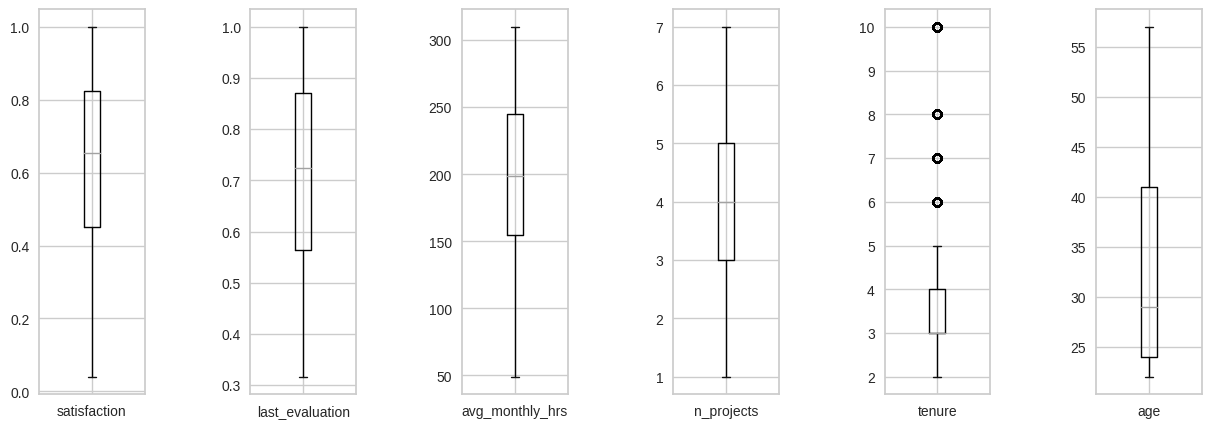

In [ ]:
fig, ax = plt.subplots(1, 6, figsize=(15, 5))

# draw boxplots - for one column in each subplot
final_merge.boxplot('satisfaction', ax=ax[0])
final_merge.boxplot('last_evaluation', ax=ax[1])
final_merge.boxplot('avg_monthly_hrs', ax=ax[2])
final_merge.boxplot('n_projects', ax=ax[3])
final_merge.boxplot('tenure', ax=ax[4])
final_merge.boxplot('age', ax=ax[5])

plt.subplots_adjust(wspace=1.0)

plt.show()

- could observe high degree of skewness in fields - **tenure**
- need not consider flag variable fields - **filed_complaint & recently_promoted**

<Axes: >

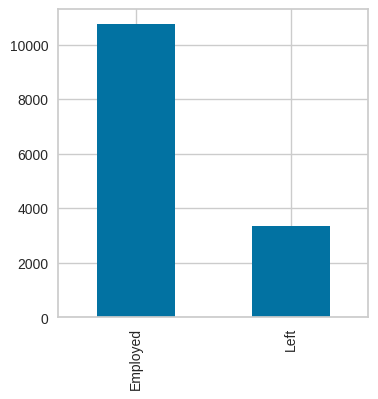

In [ ]:
fig = plt.figure(figsize = [4, 4])
final_merge['status'].value_counts().plot(kind='bar')

- **highly imbalanced data**
- misclassification / bias is anticipated from ML algorithm while handling this in the current format
- could apply "**SMOTE**" or directly do **boosting** which should be able to boost the mis-classified data with prioritization by providing higher weightage
- let proceed to see how data will behave in this original way without any upsampling as of now

<Axes: >

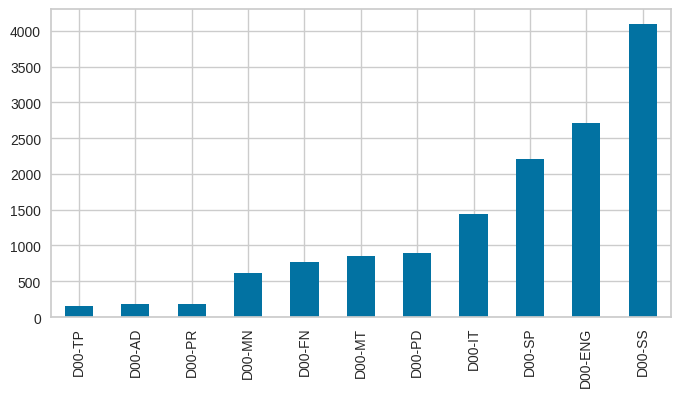

In [ ]:
fig = plt.figure(figsize = [8, 4])
final_merge['department'].value_counts().sort_values().plot(kind='bar')

In [ ]:
count = final_merge['department'].value_counts()

In [ ]:
count.info()

<class 'pandas.core.series.Series'>
Index: 11 entries, D00-SS to D00-TP
Series name: department
Non-Null Count  Dtype
--------------  -----
11 non-null     int64
dtypes: int64(1)
memory usage: 176.0+ bytes


In [ ]:
count

D00-SS     4099
D00-ENG    2712
D00-SP     2208
D00-IT     1433
D00-PD      899
D00-MT      859
D00-FN      768
D00-MN      621
D00-AD      180
D00-PR      180
D00-TP      157
Name: department, dtype: int64

In [ ]:
percentages = (count/final_merge.shape[0]) * 100

In [ ]:
print(percentages)

D00-SS     29.037971
D00-ENG    19.212241
D00-SP     15.641825
D00-IT     10.151601
D00-PD      6.368660
D00-MT      6.085293
D00-FN      5.440635
D00-MN      4.399263
D00-AD      1.275149
D00-PR      1.275149
D00-TP      1.112213
Name: department, dtype: float64


- could observe 4 departments have more than 1500 employees and accounts for majority of population

---
<a name = Section7></a>
# **7. Bi-variate Analysis**
---

<ipython-input-102-3edb1a39f2d0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(final_merge.corr(),annot=True, annot_kws={"fontsize": 7})


<Axes: >

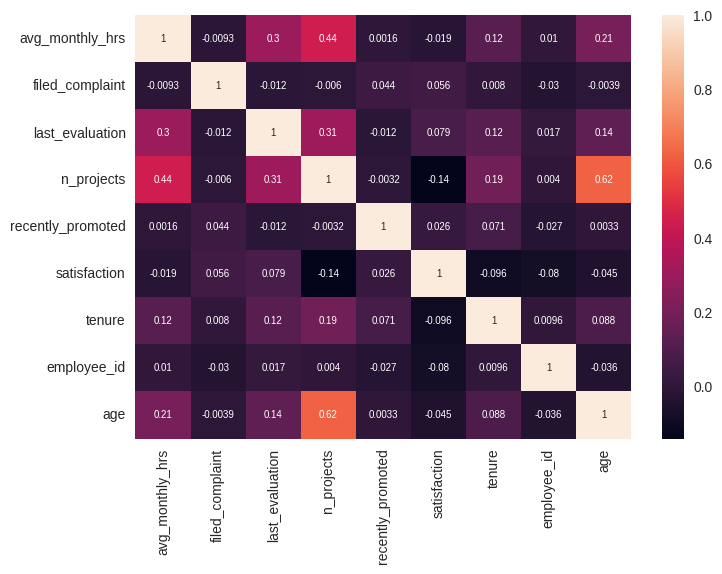

In [ ]:
#sns.set(font_scale=0.8)
sns.heatmap(final_merge.corr(),annot=True, annot_kws={"fontsize": 7})

In [ ]:
final_merge.corr()

<ipython-input-103-4198b9b54c89>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_merge.corr()


avg_monthly_hrs  filed_complaint  last_evaluation  \
avg_monthly_hrs           1.000000        -0.009322         0.301920   
filed_complaint          -0.009322         1.000000        -0.012311   
last_evaluation           0.301920        -0.012311         1.000000   
n_projects                0.439014        -0.006033         0.307945   
recently_promoted         0.001633         0.043591        -0.012025   
satisfaction             -0.019389         0.055506         0.079241   
tenure                    0.124693         0.007974         0.121433   
employee_id               0.010069        -0.030404         0.016573   
age                       0.206099        -0.003933         0.143594   

                   n_projects  recently_promoted  satisfaction    tenure  \
avg_monthly_hrs      0.439014           0.001633     -0.019389  0.124693   
filed_complaint     -0.006033           0.043591      0.055506  0.007974   
last_evaluation      0.307945          -0.012025      0.079241  0.121433   
n_projects           1.000000          -0.003159     -0.140938  0.191825   
recently_promoted   -0.003159           1.000000      0.025638  0.070623   
satisfaction        -0.140938           0.025638      1.000000 -0.096467   
tenure               0.191825           0.070623     -0.096467  1.000000   
employee_id          0.003978          -0.026640     -0.079710  0.009585   
age                  0.624943           0.003310     -0.045125  0.088002   

                   employee_id       age  
avg_monthly_hrs       0.010069  0.206099  
filed_complaint      -0.030404 -0.003933  
last_evaluation       0.016573  0.143594  
n_projects            0.003978  0.624943  
recently_promoted    -0.026640  0.003310  
satisfaction         -0.079710 -0.045125  
tenure                0.009585  0.088002  
employee_id           1.000000 -0.036190  
age                  -0.036190  1.000000

##**Observations:**
- Multicolinearity (X and X correlation) observed to some extent in one of the scenario - **age and n_projects but correlation is only around 62%**, which is less than preferred value of >75%
- no X and Y correlation observed

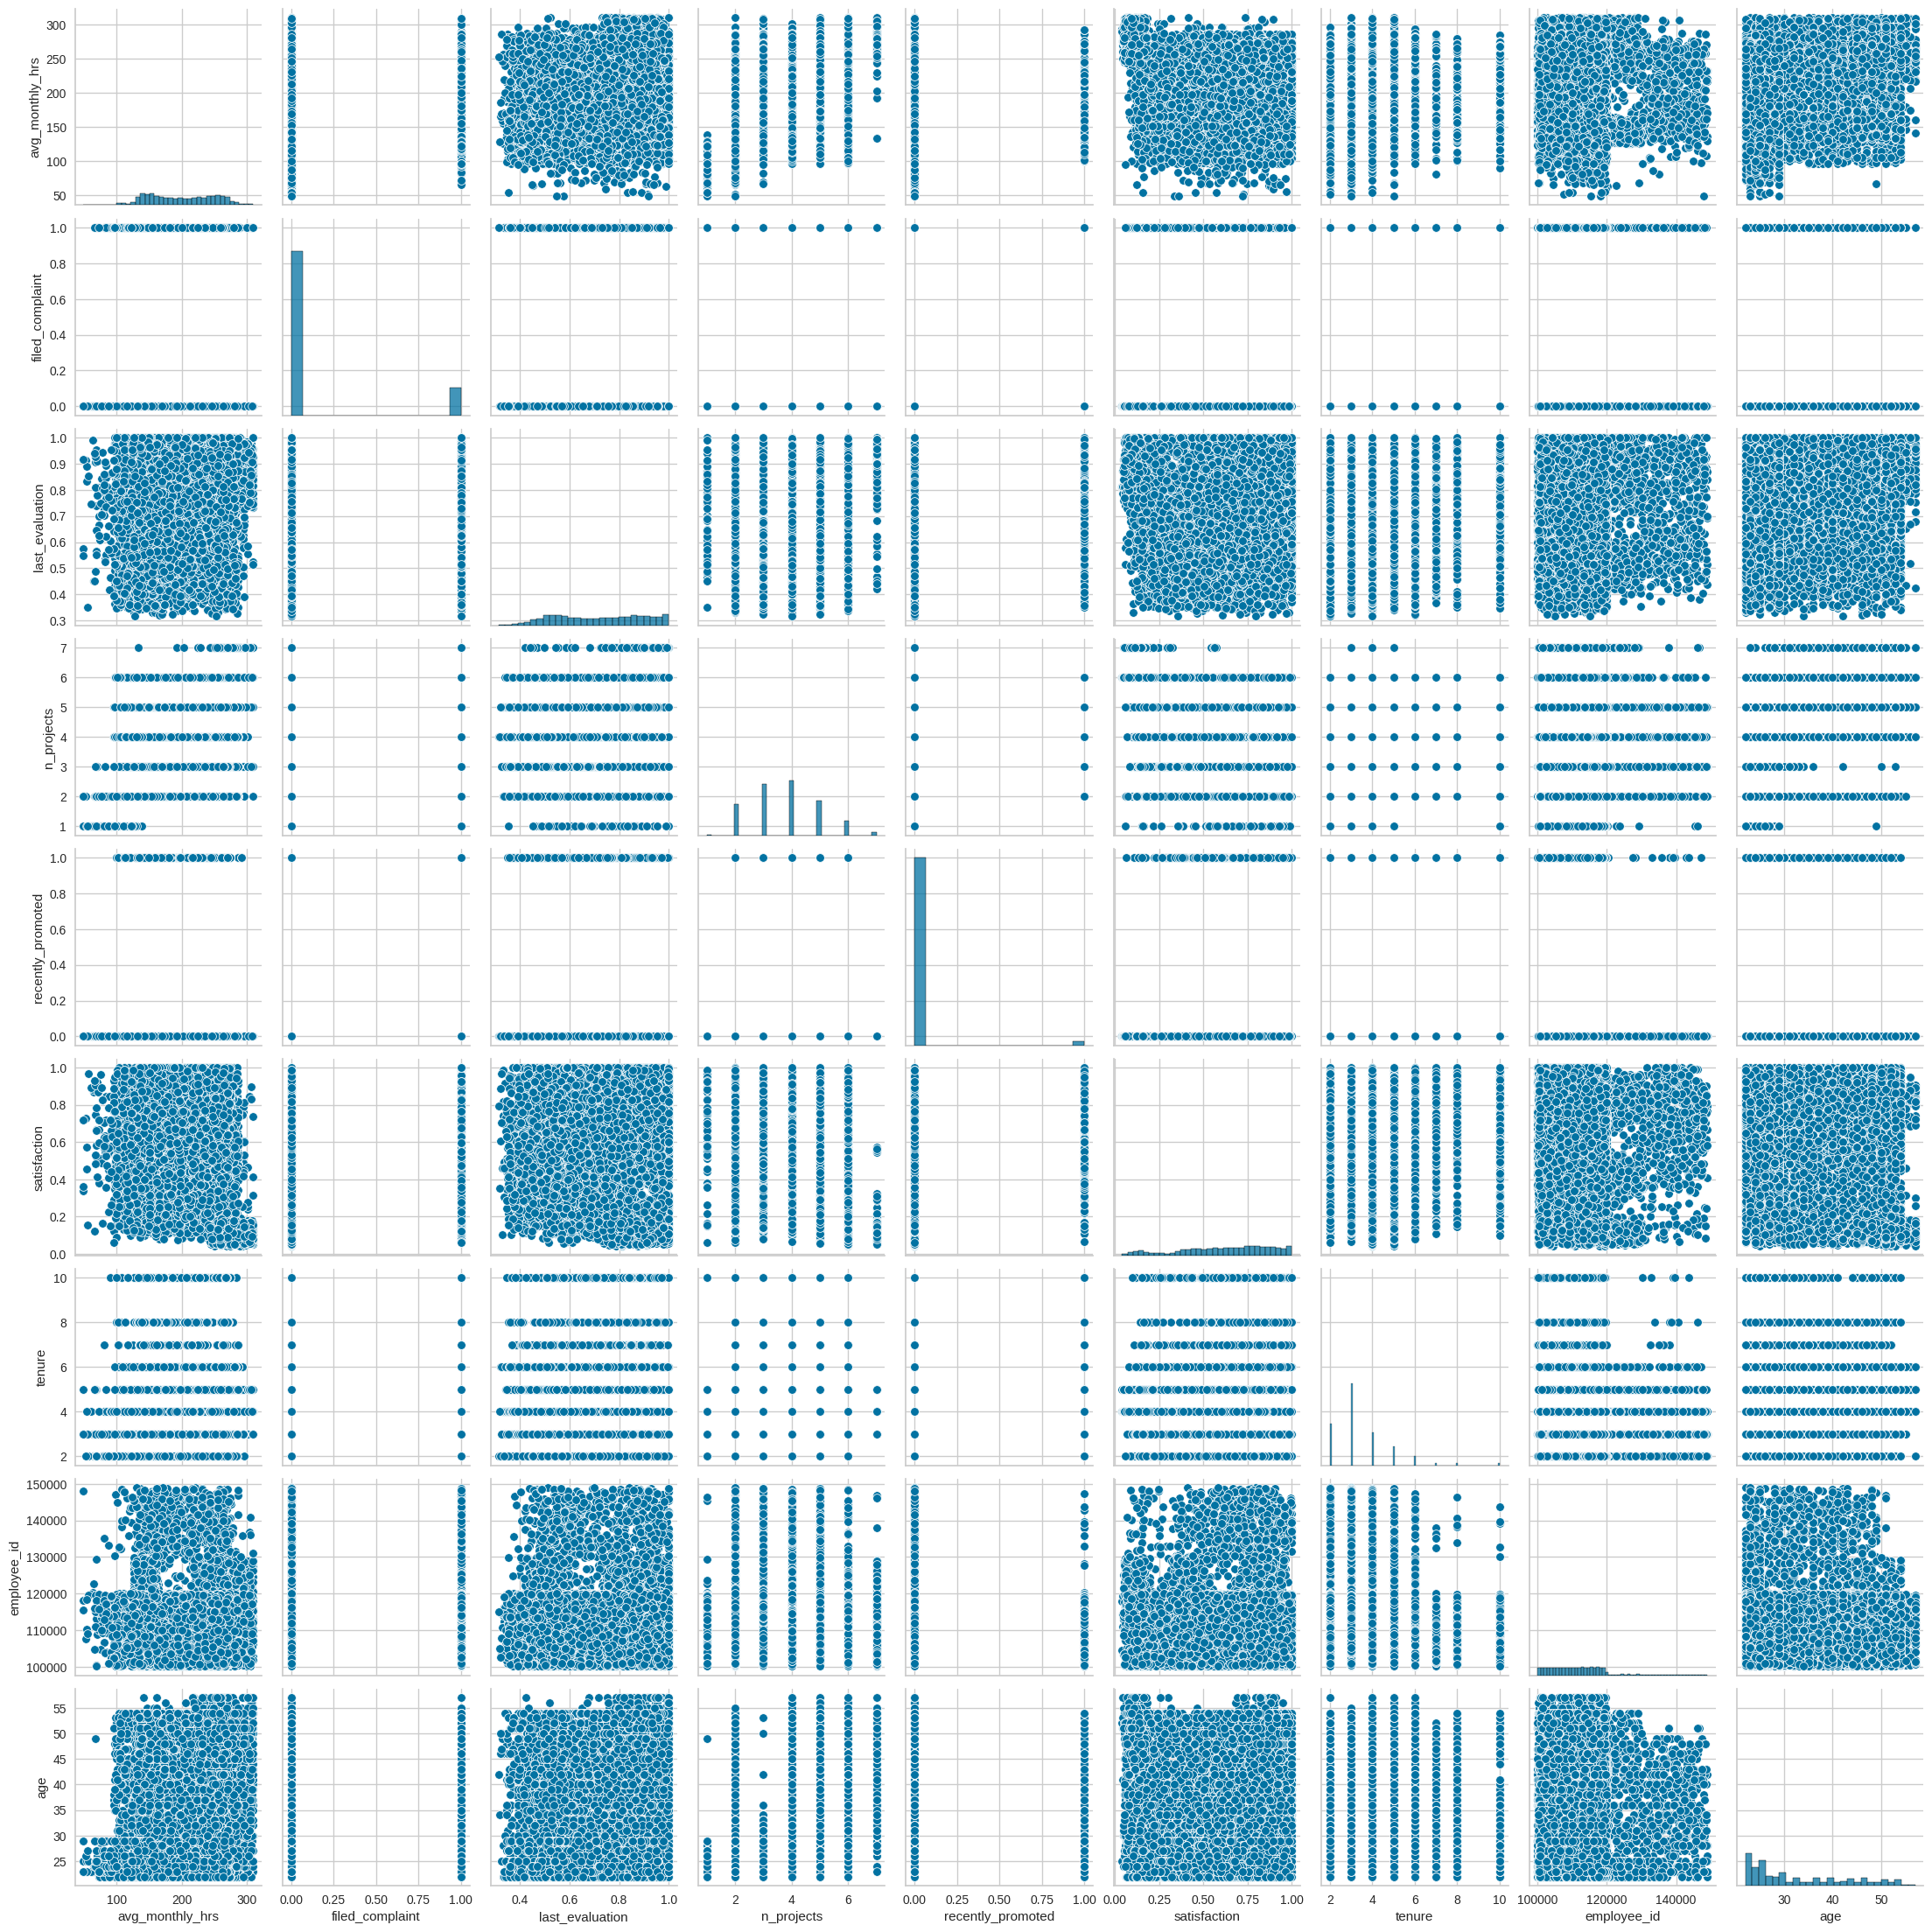

In [ ]:
sns.pairplot(final_merge)

- No conclusion derived from pair plot as expected (reflection of correlation values)

In [ ]:
final_merge.dtypes.sort_values()

avg_monthly_hrs        int64
filed_complaint        int64
n_projects             int64
recently_promoted      int64
tenure                 int64
employee_id            int64
age                    int64
last_evaluation      float64
satisfaction         float64
department            object
salary                object
status                object
gender                object
marital_status        object
dept_name             object
dept_head             object
dtype: object

In [ ]:
final_merge.nunique().sort_values()

filed_complaint          2
recently_promoted        2
status                   2
gender                   2
marital_status           2
salary                   3
n_projects               7
tenure                   8
department              11
dept_name               11
dept_head               11
age                     36
avg_monthly_hrs        249
last_evaluation      12184
satisfaction         13492
employee_id          14116
dtype: int64

##**Chi-Square Analysis**

In [ ]:
from scipy.stats import chi2_contingency
def chi2_sq_test(var1, var2):
  tab = pd.crosstab(var1, var2)
  _, p, _, _ = chi2_contingency(tab, correction=False)
  print (tab)
  print()
  if p < 0.05:
    print('Accept the alternate Hypothesis', round(p,5))
  else:
    print('Failed to reject the null Hypothesis', round(p,5))

###**1. Relation b/w Department and Status**

*  Ho (Null hypothesis) : Department and status are independant
*  H1 (alternate): Department and Status are dependant

In [ ]:
chi2_sq_test(final_merge['department'], final_merge['status'])

status      Employed  Left
department                
D00-AD           145    35
D00-ENG         2017   695
D00-FN           558   210
D00-IT          1115   318
D00-MN           530    91
D00-MT           653   206
D00-PD           700   199
D00-PR           162    18
D00-SP          1651   557
D00-SS          3097  1002
D00-TP           133    24

Accept the alternate Hypothesis 0.0


###**2. Relation b/w Salary and Status**

*  Ho (Null hypothesis) : Salary and status are independant
*  H1 (alternate): Salary and Status are dependant

In [ ]:
chi2_sq_test(final_merge['salary'], final_merge['status'])

status  Employed  Left
salary                
high        1064    77
low         4851  2038
medium      4846  1240

Accept the alternate Hypothesis 0.0


###**3. Relation b/w Gender and Status**

*  Ho (Null hypothesis) : Gender and status are independant
*  H1 (alternate): Gender and Status are dependant

In [ ]:
chi2_sq_test(final_merge['gender'], final_merge['status'])

status  Employed  Left
gender                
Female      3334  1495
Male        7427  1860

Accept the alternate Hypothesis 0.0


###**4. Relation b/w Marital_Status and Status**

*  Ho (Null hypothesis) : Marital_Status and status are independant
*  H1 (alternate): Marital_Status and Status are dependant

In [ ]:
chi2_sq_test(final_merge['marital_status'], final_merge['status'])

status          Employed  Left
marital_status                
Married             5497  1408
Unmarried           5264  1947

Accept the alternate Hypothesis 0.0


###**5. Relation b/w dept_name and Status**

*  Ho (Null hypothesis) : dept_name and status are independant
*  H1 (alternate): dept_name and Status are dependant

In [ ]:
chi2_sq_test(final_merge['dept_name'], final_merge['status'])

status       Employed  Left
dept_name                  
Admin             145    35
Engineering      2017   695
Finance           558   210
IT               1115   318
Management        530    91
Marketing         653   206
Procurement       162    18
Product           700   199
Sales            3097  1002
Support          1651   557
Temp              133    24

Accept the alternate Hypothesis 0.0


###**6. Relation b/w dept_head and Status**

*  Ho (Null hypothesis) : dept_head and status are independant
*  H1 (alternate): dept_head and Status are dependant

In [ ]:
chi2_sq_test(final_merge['dept_head'], final_merge['status'])

status                 Employed  Left
dept_head                            
Aanchal J                   558   210
Amelia Westray             1651   557
Darcy Staines               700   199
Edward J Bayley            3097  1002
Ellie Trafton               530    91
Evelyn Tolson               145    35
Henry Adey                 1115   318
Louie Viles                 162    18
Micheal Zachrey             133    24
Reuben Swann                653   206
Sushant Raghunathan K      2017   695

Accept the alternate Hypothesis 0.0


###**7. Relation b/w filed_complaint and Status**

*  Ho (Null hypothesis) : filed_complaint and status are independant
*  H1 (alternate): filed_complaint and Status are dependant

In [ ]:
chi2_sq_test(final_merge['filed_complaint'], final_merge['status'])

status           Employed  Left
filed_complaint                
0                    8872  3203
1                    1889   152

Accept the alternate Hypothesis 0.0


###**8. Relation b/w recently_promoted and Status**

*  Ho (Null hypothesis) : recently_promoted and status are independant
*  H1 (alternate): recently_promoted and Status are dependant

In [ ]:
chi2_sq_test(final_merge['recently_promoted'], final_merge['status'])

status             Employed  Left
recently_promoted                
0                     10482  3337
1                       279    18

Accept the alternate Hypothesis 0.0


###**8. Relation b/w tenure and Status**

*  Ho (Null hypothesis) : tenure and status are independant
*  H1 (alternate): tenure and Status are dependant

In [ ]:
chi2_sq_test(final_merge['tenure'], final_merge['status'])

status  Employed  Left
tenure                
2           3003    51
3           4572  1499
4           1577   839
5            602   775
6            471   191
7            181     0
8            155     0
10           200     0

Accept the alternate Hypothesis 0.0


###**9. Relation b/w Age and Status**

*  Ho (Null hypothesis) : age and status are independant
*  H1 (alternate): age and Status are dependant

In [ ]:
chi2_sq_test(final_merge['age'], final_merge['status'])

status  Employed  Left
age                   
22           800   366
23           814   382
24           935   373
25           874   372
26           504   122
27           522   140
28           523   124
29           536   124
30           224    51
31           177    48
32           223    54
33           220    59
34           201    42
35           220    41
36           218    51
37           225    59
38           224    45
39           223    47
40           228    43
41           219    50
42           253    50
43           220    45
44           188    62
45           212    52
46           214    57
47           224    54
48           221    51
49           195    48
50           181    52
51           175    52
52           211    41
53           186    49
54           171    55
55             0    38
56             0    22
57             0    34

Accept the alternate Hypothesis 0.0


---
<a name = Section8></a>
# **8. Data Preparation**
---

- Encoding the dataset for Multiclass Categorical variables using **one hot encoder**
- **Label encoders** are used when there are 2-3 classes are there for the categorical fields, if there are more options (say >3 classes) for the field, **one-hot encoder** is preferred
- One-hot will give additional columns - 0, 1, 2, 3, 4 ...
- Label encoder will give in same column different values - 0,1,2,3
Label encoder preferred for ordinal data

In [ ]:
final_merge

avg_monthly_hrs department  filed_complaint  last_evaluation  \
0                  246     D00-SS                0         0.866838   
1                  156     D00-SS                1         0.474082   
2                  146     D00-SS                0         0.507349   
3                  281     D00-SS                0         0.907965   
4                  269     D00-SS                0         0.959077   
...                ...        ...              ...              ...   
14111              122     D00-TP                0         0.907114   
14112               49     D00-TP                0         0.916496   
14113               97     D00-TP                1         0.514723   
14114              132     D00-TP                0         0.711681   
14115              116     D00-TP                0         0.754973   

       n_projects  recently_promoted  salary  satisfaction    status  tenure  \
0               6                  0  medium      0.134415      Left       4   
1               2                  0  medium      0.405101      Left       3   
2               2                  0  medium      0.434845      Left       3   
3               6                  0  medium      0.105749      Left       4   
4               4                  0  medium      0.960757      Left       5   
...           ...                ...     ...           ...       ...     ...   
14111           2                  0  medium      0.755297  Employed       4   
14112           2                  0     low      0.719638  Employed       3   
14113           1                  0  medium      0.767568  Employed       3   
14114           2                  0  medium      0.625086      Left       5   
14115           2                  0     low      0.816925  Employed       3   

       employee_id  age  gender marital_status dept_name        dept_head  
0           124467   42  Female        Married     Sales  Edward J Bayley  
1           126150   24  Female      Unmarried     Sales  Edward J Bayley  
2           113707   23  Female      Unmarried     Sales  Edward J Bayley  
3           122394   50  Female        Married     Sales  Edward J Bayley  
4           126860   25  Female      Unmarried     Sales  Edward J Bayley  
...            ...  ...     ...            ...       ...              ...  
14111       111990   23    Male      Unmarried      Temp  Micheal Zachrey  
14112       148021   23    Male      Unmarried      Temp  Micheal Zachrey  
14113       116171   29    Male      Unmarried      Temp  Micheal Zachrey  
14114       106482   27    Male      Unmarried      Temp  Micheal Zachrey  
14115       105231   23    Male      Unmarried      Temp  Micheal Zachrey  

[14116 rows x 16 columns]

- **creating new dataframe 'train' just to avoid getting encoding to original data**

In [ ]:
train = final_merge.copy()

In [ ]:
train.nunique()

avg_monthly_hrs        249
department              11
filed_complaint          2
last_evaluation      12184
n_projects               7
recently_promoted        2
salary                   3
satisfaction         13492
status                   2
tenure                   8
employee_id          14116
age                     36
gender                   2
marital_status           2
dept_name               11
dept_head               11
dtype: int64

##**Dropping Few fields**

- here, fields  - age, gender, marital_status, dept_name, dept_head are decided to drop, based on production data

In [ ]:
train.drop(['age','gender', 'marital_status', 'dept_name', 'dept_head'], axis=1, inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14116 non-null  int64  
 1   department         14116 non-null  object 
 2   filed_complaint    14116 non-null  int64  
 3   last_evaluation    14116 non-null  float64
 4   n_projects         14116 non-null  int64  
 5   recently_promoted  14116 non-null  int64  
 6   salary             14116 non-null  object 
 7   satisfaction       14116 non-null  float64
 8   status             14116 non-null  object 
 9   tenure             14116 non-null  int64  
 10  employee_id        14116 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


##**One-hot Encoding**

In [ ]:
train = pd.get_dummies(train, columns = ['department','salary'])

In [ ]:
train.head()

avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
0              246                0         0.866838           6   
1              156                1         0.474082           2   
2              146                0         0.507349           2   
3              281                0         0.907965           6   
4              269                0         0.959077           4   

   recently_promoted  satisfaction status  tenure  employee_id  \
0                  0      0.134415   Left       4       124467   
1                  0      0.405101   Left       3       126150   
2                  0      0.434845   Left       3       113707   
3                  0      0.105749   Left       4       122394   
4                  0      0.960757   Left       5       126860   

   department_D00-AD  ...  department_D00-MN  department_D00-MT  \
0                  0  ...                  0                  0   
1                  0  ...                  0                  0   
2                  0  ...                  0                  0   
3                  0  ...                  0                  0   
4                  0  ...                  0                  0   

   department_D00-PD  department_D00-PR  department_D00-SP  department_D00-SS  \
0                  0                  0                  0                  1   
1                  0                  0                  0                  1   
2                  0                  0                  0                  1   
3                  0                  0                  0                  1   
4                  0                  0                  0                  1   

   department_D00-TP  salary_high  salary_low  salary_medium  
0                  0            0           0              1  
1                  0            0           0              1  
2                  0            0           0              1  
3                  0            0           0              1  
4                  0            0           0              1  

[5 rows x 23 columns]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_monthly_hrs     14116 non-null  int64  
 1   filed_complaint     14116 non-null  int64  
 2   last_evaluation     14116 non-null  float64
 3   n_projects          14116 non-null  int64  
 4   recently_promoted   14116 non-null  int64  
 5   satisfaction        14116 non-null  float64
 6   status              14116 non-null  object 
 7   tenure              14116 non-null  int64  
 8   employee_id         14116 non-null  int64  
 9   department_D00-AD   14116 non-null  uint8  
 10  department_D00-ENG  14116 non-null  uint8  
 11  department_D00-FN   14116 non-null  uint8  
 12  department_D00-IT   14116 non-null  uint8  
 13  department_D00-MN   14116 non-null  uint8  
 14  department_D00-MT   14116 non-null  uint8  
 15  department_D00-PD   14116 non-null  uint8  
 16  depa

## **Encoding "Status" target field**

- **Encoding "Status"** field using label encoder for facilitating XGboost run
- 1 for the Left and 0 for the Employed

In [ ]:
le = LabelEncoder()
train['status'] = le.fit_transform(train['status'])

In [ ]:
train['status']

0        1
1        1
2        1
3        1
4        1
        ..
14111    0
14112    0
14113    0
14114    1
14115    0
Name: status, Length: 14116, dtype: int64

##**Split Train and Test**

In [ ]:
x=train.drop(['status'], axis=1)

In [ ]:
y=train['status']

In [ ]:
print(x.shape)
print(y.shape)

(14116, 22)
(14116,)


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14111    0
14112    0
14113    0
14114    1
14115    0
Name: status, Length: 14116, dtype: int64

In [ ]:
x.head()

avg_monthly_hrs  filed_complaint  last_evaluation  n_projects  \
0              246                0         0.866838           6   
1              156                1         0.474082           2   
2              146                0         0.507349           2   
3              281                0         0.907965           6   
4              269                0         0.959077           4   

   recently_promoted  satisfaction  tenure  employee_id  department_D00-AD  \
0                  0      0.134415       4       124467                  0   
1                  0      0.405101       3       126150                  0   
2                  0      0.434845       3       113707                  0   
3                  0      0.105749       4       122394                  0   
4                  0      0.960757       5       126860                  0   

   department_D00-ENG  ...  department_D00-MN  department_D00-MT  \
0                   0  ...                  0                  0   
1                   0  ...                  0                  0   
2                   0  ...                  0                  0   
3                   0  ...                  0                  0   
4                   0  ...                  0                  0   

   department_D00-PD  department_D00-PR  department_D00-SP  department_D00-SS  \
0                  0                  0                  0                  1   
1                  0                  0                  0                  1   
2                  0                  0                  0                  1   
3                  0                  0                  0                  1   
4                  0                  0                  0                  1   

   department_D00-TP  salary_high  salary_low  salary_medium  
0                  0            0           0              1  
1                  0            0           0              1  
2                  0            0           0              1  
3                  0            0           0              1  
4                  0            0           0              1  

[5 rows x 22 columns]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11292, 22)
(2824, 22)
(11292,)
(2824,)


---
<a name = Section9></a>
# **9. ML Model Exploration**
---

In [ ]:
def model_eval(actual,predicted):
  conf_matrix = confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  acc_score = accuracy_score(actual, predicted)
  print('The Accuracy of the model is: ', round(acc_score, 2))
  print('class_rep is:\n \n', clas_rep)
  print('conf_matrix is:\n \n', conf_matrix)

<a name = Section91></a>
### **9.1 Logistic Regression Trial**

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
preds_train_lr = lr.predict(x_train)
preds_test_lr = lr.predict(x_test)

In [ ]:
model_eval(y_train,preds_train_lr)

The Accuracy of the model is:  0.76
class_rep is:
 
               precision    recall  f1-score   support

           0       0.76      1.00      0.86      8576
           1       0.00      0.00      0.00      2716

    accuracy                           0.76     11292
   macro avg       0.38      0.50      0.43     11292
weighted avg       0.58      0.76      0.66     11292

conf_matrix is:
 
 [[8576    0]
 [2716    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_eval(y_test, preds_test_lr)

The Accuracy of the model is:  0.77
class_rep is:
 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      2185
           1       0.00      0.00      0.00       639

    accuracy                           0.77      2824
   macro avg       0.39      0.50      0.44      2824
weighted avg       0.60      0.77      0.68      2824

conf_matrix is:
 
 [[2185    0]
 [ 639    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####**Observations from Logistic Regression**
- as expected being highly imbalanced data and highly heterogeneous (non-linear) as evident from high skeweness in few fields, logistic regression did not prove to be the right model
- **very poor F1-score for "Left" category**

<a name = Section92></a>
### **9.2 Decision Tree Trial**

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
preds_dtree_train=dtree.predict(x_train)
preds_dtree_test=dtree.predict(x_test)

In [ ]:
model_eval(y_train, preds_dtree_train)

The Accuracy of the model is:  1.0
class_rep is:
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8576
           1       1.00      1.00      1.00      2716

    accuracy                           1.00     11292
   macro avg       1.00      1.00      1.00     11292
weighted avg       1.00      1.00      1.00     11292

conf_matrix is:
 
 [[8576    0]
 [   0 2716]]


In [ ]:
  model_eval(y_test, preds_dtree_test)

The Accuracy of the model is:  0.96
class_rep is:
 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      2185
           1       0.91      0.93      0.92       639

    accuracy                           0.96      2824
   macro avg       0.94      0.95      0.95      2824
weighted avg       0.96      0.96      0.96      2824

conf_matrix is:
 
 [[2123   62]
 [  43  596]]


####**Observations from Decision Tree**

- **Low bias model**, as model has high train accuracy
- Bit a **high variance** wrt f1-score for "Left" category, as it is >5% difference b/w train and test
- **Overfit** model overall to an extent
- Could explore hyperparameters tuning

**NOTE for BIAS-VARIANCE Trade off:**
  * low train accuracy is referred as **high bias model**
  * lower difference in train and test accuracy is **low variance model**
  * high train accuracy is referred as **low bias model**
  * higher difference in train and test accuracy is **high variance model**

####**Feature importances**

In [ ]:
dtree.feature_importances_

array([1.77554550e-01, 1.41095245e-03, 1.00083989e-01, 1.18276392e-01,
       7.24166901e-06, 3.96923784e-01, 1.38931644e-01, 4.76563135e-02,
       1.22214182e-03, 1.69657170e-03, 5.79121687e-04, 2.00144088e-03,
       9.16201632e-04, 4.03994158e-04, 3.23195327e-04, 3.76025332e-04,
       2.27139752e-03, 1.16425338e-03, 2.41089010e-03, 2.48584799e-03,
       1.96798623e-03, 1.33606640e-03])

In [ ]:
importances = list(zip(dtree.feature_importances_, x_train.columns))
importances.sort(reverse=True)
print(importances)

[(0.39692378385523713, 'satisfaction'), (0.17755455014410337, 'avg_monthly_hrs'), (0.13893164381124784, 'tenure'), (0.11827639188232407, 'n_projects'), (0.10008398856813513, 'last_evaluation'), (0.04765631347565205, 'employee_id'), (0.002485847988860399, 'salary_high'), (0.002410890096140731, 'department_D00-TP'), (0.0022713975219759088, 'department_D00-SP'), (0.0020014408783986092, 'department_D00-IT'), (0.001967986232603097, 'salary_low'), (0.0016965716991485843, 'department_D00-ENG'), (0.0014109524494111728, 'filed_complaint'), (0.0013360663954187614, 'salary_medium'), (0.0012221418165677335, 'department_D00-AD'), (0.0011642533794793454, 'department_D00-SS'), (0.0009162016317141084, 'department_D00-MN'), (0.0005791216872854587, 'department_D00-FN'), (0.000403994158441958, 'department_D00-MT'), (0.00037602533208828395, 'department_D00-PR'), (0.0003231953267535664, 'department_D00-PD'), (7.241669012623043e-06, 'recently_promoted')]


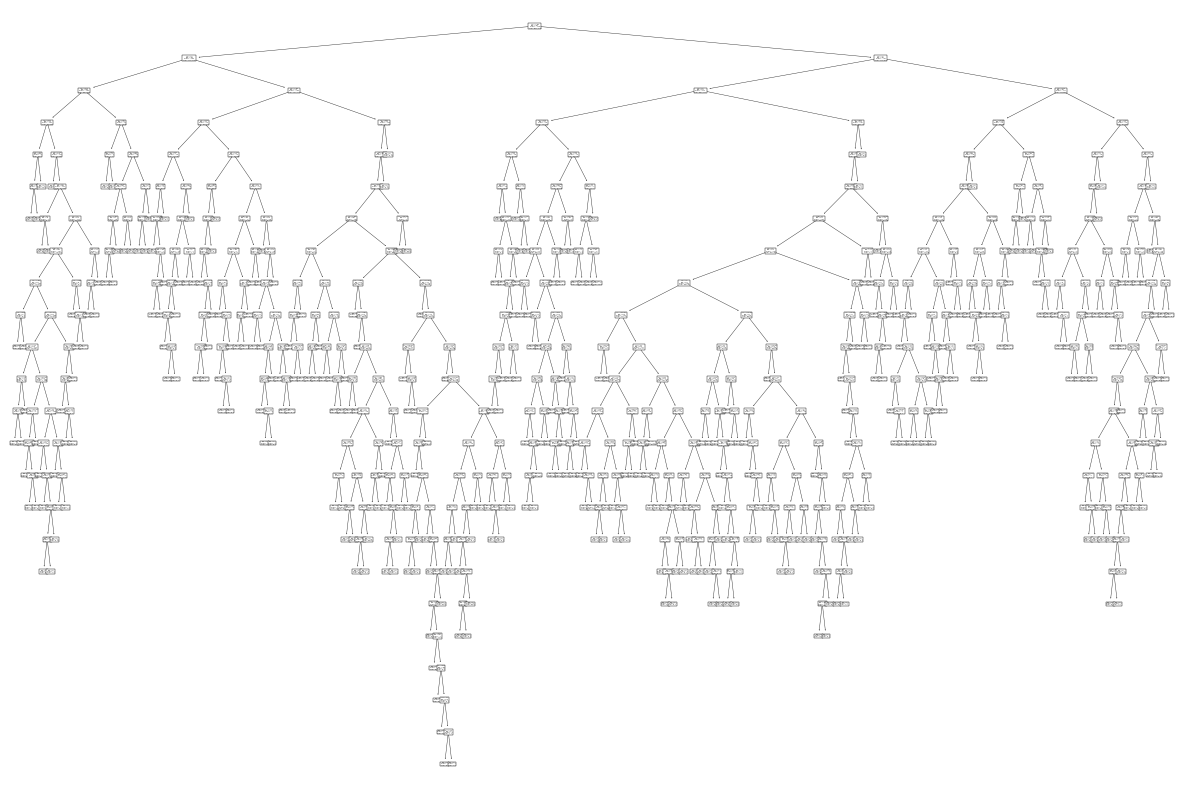

In [ ]:
import sklearn
plt.figure(figsize=(15, 10))
sklearn.tree.plot_tree(dtree)
plt.show()

In [ ]:
sorted_imp = sorted(importances, reverse = True)
print(sorted_imp)

[(0.39692378385523713, 'satisfaction'), (0.17755455014410337, 'avg_monthly_hrs'), (0.13893164381124784, 'tenure'), (0.11827639188232407, 'n_projects'), (0.10008398856813513, 'last_evaluation'), (0.04765631347565205, 'employee_id'), (0.002485847988860399, 'salary_high'), (0.002410890096140731, 'department_D00-TP'), (0.0022713975219759088, 'department_D00-SP'), (0.0020014408783986092, 'department_D00-IT'), (0.001967986232603097, 'salary_low'), (0.0016965716991485843, 'department_D00-ENG'), (0.0014109524494111728, 'filed_complaint'), (0.0013360663954187614, 'salary_medium'), (0.0012221418165677335, 'department_D00-AD'), (0.0011642533794793454, 'department_D00-SS'), (0.0009162016317141084, 'department_D00-MN'), (0.0005791216872854587, 'department_D00-FN'), (0.000403994158441958, 'department_D00-MT'), (0.00037602533208828395, 'department_D00-PR'), (0.0003231953267535664, 'department_D00-PD'), (7.241669012623043e-06, 'recently_promoted')]


#####Function to get feature importances (list type object) in column wise

In [ ]:
def print_list_of_lists(list_of_lists):
  """Prints a list of lists in columns.

  Args:
    list_of_lists: A list of lists.

  Returns:
    None.
  """

  # Get the maximum length of any list in the list of lists.
  max_length = max(len(list_) for list_ in sorted_imp)

  # Print the list of lists, with each list indented by the difference between
  # its length and the maximum length.
  for list_ in sorted_imp:
    print(' ' * (max_length - len(list_)) + ' '.join(list_))

In [ ]:
importances

[(0.39692378385523713, 'satisfaction'),
 (0.17755455014410337, 'avg_monthly_hrs'),
 (0.13893164381124784, 'tenure'),
 (0.11827639188232407, 'n_projects'),
 (0.10008398856813513, 'last_evaluation'),
 (0.04765631347565205, 'employee_id'),
 (0.002485847988860399, 'salary_high'),
 (0.002410890096140731, 'department_D00-TP'),
 (0.0022713975219759088, 'department_D00-SP'),
 (0.0020014408783986092, 'department_D00-IT'),
 (0.001967986232603097, 'salary_low'),
 (0.0016965716991485843, 'department_D00-ENG'),
 (0.0014109524494111728, 'filed_complaint'),
 (0.0013360663954187614, 'salary_medium'),
 (0.0012221418165677335, 'department_D00-AD'),
 (0.0011642533794793454, 'department_D00-SS'),
 (0.0009162016317141084, 'department_D00-MN'),
 (0.0005791216872854587, 'department_D00-FN'),
 (0.000403994158441958, 'department_D00-MT'),
 (0.00037602533208828395, 'department_D00-PR'),
 (0.0003231953267535664, 'department_D00-PD'),
 (7.241669012623043e-06, 'recently_promoted')]

- All the above vaues are **gini value**, as default criterion is gini
- could take cut off for feature selections with values upto 10% (in other words, values will be b/w 0 to 1; select above 0.1 or 0.2)

- Now in **real world**, it is very **rare** that **all** the **features** are **important** while developing the model.

- So **instead** we **analyze** the **impact** of **input over the target** feature.

- We do so by either performing **statistical** **tests** (Pearson, ANOVA, Chi-Square) or by using **Random Forest**.

- **Random forests** are one the most **popular machine learning algorithms** because they **provide**:
 - **a good predictive performance**,
 - **low overfitting and**
 - **easy interpretability.**

- This **interpretability** is **derived** from the **importance of each feature** on the tree decision **evaluated** on the **reduction** in **impurity**.

- In other words, it is **easy to compute** how much **each feature is contributing** to the **decision**.

- **Below** we have **implemented** a function namely, **SelectFromModel** **available** in **Sklearn** which **uses** the **base estimator** to **identify** **important features**.

- The **importance** of feature is **determined** on the **basis** of **threshold** (a measure to calculate feature importance).

- This threshold is **used over** the **information gain** which results in **reduction in impurity**.

- And **finally** we will **split** our **data** for the **model development**

<a name = Section93></a>
### **9.3 Random Forest Trial**

In [ ]:
rf = RandomForestClassifier(verbose = 2)
rf.fit(x_train, y_train)
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s


building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [ ]:
model_eval(y_train, preds_rf_train)

The Accuracy of the model is:  1.0
class_rep is:
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8576
           1       1.00      1.00      1.00      2716

    accuracy                           1.00     11292
   macro avg       1.00      1.00      1.00     11292
weighted avg       1.00      1.00      1.00     11292

conf_matrix is:
 
 [[8576    0]
 [   0 2716]]


In [ ]:
model_eval(y_test, preds_rf_test)

The Accuracy of the model is:  0.98
class_rep is:
 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2185
           1       0.98      0.92      0.95       639

    accuracy                           0.98      2824
   macro avg       0.98      0.96      0.97      2824
weighted avg       0.98      0.98      0.98      2824

conf_matrix is:
 
 [[2172   13]
 [  52  587]]


####**Observations from Random Forest**
- **Low bias** model, as it has high train accuracy
- **Low variance** model, as it has low variance (upto 5% difference b/w train and test accuracy, f1-score)
- 52 employees has been marked **False Negative**; actually they left, but model says they are not

<a name = Section93a></a>
### **9.3a Random Forest Trial with Feature Selection**

In [ ]:
rf.feature_importances_

array([0.15432415, 0.0124091 , 0.09876403, 0.17481097, 0.00159445,
       0.24564406, 0.16656659, 0.10347822, 0.00098877, 0.00413026,
       0.00207536, 0.00229845, 0.00176717, 0.00135904, 0.00163322,
       0.00053668, 0.00295704, 0.00365321, 0.00405664, 0.00549177,
       0.00781817, 0.00364266])

In [ ]:
importances = list(zip(rf.feature_importances_, x_train.columns))
importances.sort(reverse=True)
print(importances)

[(0.24564406016251317, 'satisfaction'), (0.17481096767542387, 'n_projects'), (0.16656658857183507, 'tenure'), (0.15432414872012712, 'avg_monthly_hrs'), (0.10347822255463947, 'employee_id'), (0.09876403305912496, 'last_evaluation'), (0.012409103723166665, 'filed_complaint'), (0.007818166363517235, 'salary_low'), (0.005491771439917834, 'salary_high'), (0.004130257798753042, 'department_D00-ENG'), (0.004056635844135896, 'department_D00-TP'), (0.0036532050980445903, 'department_D00-SS'), (0.0036426641621317883, 'salary_medium'), (0.002957041056528502, 'department_D00-SP'), (0.0022984525000697247, 'department_D00-IT'), (0.002075357284337079, 'department_D00-FN'), (0.0017671707061397773, 'department_D00-MN'), (0.0016332157075062727, 'department_D00-PD'), (0.0015944461492784872, 'recently_promoted'), (0.0013590381399506849, 'department_D00-MT'), (0.0009887733583984855, 'department_D00-AD'), (0.0005366799244602371, 'department_D00-PR')]


In [ ]:
sorted_imp = sorted(importances, reverse = True)
print(sorted_imp)

[(0.24564406016251317, 'satisfaction'), (0.17481096767542387, 'n_projects'), (0.16656658857183507, 'tenure'), (0.15432414872012712, 'avg_monthly_hrs'), (0.10347822255463947, 'employee_id'), (0.09876403305912496, 'last_evaluation'), (0.012409103723166665, 'filed_complaint'), (0.007818166363517235, 'salary_low'), (0.005491771439917834, 'salary_high'), (0.004130257798753042, 'department_D00-ENG'), (0.004056635844135896, 'department_D00-TP'), (0.0036532050980445903, 'department_D00-SS'), (0.0036426641621317883, 'salary_medium'), (0.002957041056528502, 'department_D00-SP'), (0.0022984525000697247, 'department_D00-IT'), (0.002075357284337079, 'department_D00-FN'), (0.0017671707061397773, 'department_D00-MN'), (0.0016332157075062727, 'department_D00-PD'), (0.0015944461492784872, 'recently_promoted'), (0.0013590381399506849, 'department_D00-MT'), (0.0009887733583984855, 'department_D00-AD'), (0.0005366799244602371, 'department_D00-PR')]


In [ ]:
def print_list_of_lists(list_of_lists):
  max_length = max(len(list_) for list_ in sorted_imp)
  for list_ in sorted_imp:
    print(' ' * (max_length - len(list_)) + ' '.join(list_))

In [ ]:
importances

[(0.24564406016251317, 'satisfaction'),
 (0.17481096767542387, 'n_projects'),
 (0.16656658857183507, 'tenure'),
 (0.15432414872012712, 'avg_monthly_hrs'),
 (0.10347822255463947, 'employee_id'),
 (0.09876403305912496, 'last_evaluation'),
 (0.012409103723166665, 'filed_complaint'),
 (0.007818166363517235, 'salary_low'),
 (0.005491771439917834, 'salary_high'),
 (0.004130257798753042, 'department_D00-ENG'),
 (0.004056635844135896, 'department_D00-TP'),
 (0.0036532050980445903, 'department_D00-SS'),
 (0.0036426641621317883, 'salary_medium'),
 (0.002957041056528502, 'department_D00-SP'),
 (0.0022984525000697247, 'department_D00-IT'),
 (0.002075357284337079, 'department_D00-FN'),
 (0.0017671707061397773, 'department_D00-MN'),
 (0.0016332157075062727, 'department_D00-PD'),
 (0.0015944461492784872, 'recently_promoted'),
 (0.0013590381399506849, 'department_D00-MT'),
 (0.0009887733583984855, 'department_D00-AD'),
 (0.0005366799244602371, 'department_D00-PR')]

- could take cut off for feature selections with values upto 10% (in other words, values will be b/w 0 to 1; select above 0.1 or 0.2)

In [ ]:
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 123, n_jobs = -1))
selector.fit(x, y)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1, random_state=123))

In [ ]:
selected_feat = x.columns[(selector.get_support())].tolist()

In [ ]:
print('Total Features Selected are', len(selected_feat))
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 6
Threshold set by Model: 0.05
Features: ['avg_monthly_hrs', 'last_evaluation', 'n_projects', 'satisfaction', 'tenure', 'employee_id']


In [ ]:
x.columns

Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'satisfaction', 'tenure', 'employee_id',
       'department_D00-AD', 'department_D00-ENG', 'department_D00-FN',
       'department_D00-IT', 'department_D00-MN', 'department_D00-MT',
       'department_D00-PD', 'department_D00-PR', 'department_D00-SP',
       'department_D00-SS', 'department_D00-TP', 'salary_high', 'salary_low',
       'salary_medium'],
      dtype='object')

In [ ]:
selector.get_support()

array([ True, False,  True,  True, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

**Visualization of Important Features:**

- Below features are plotted against their relative importance (in %age), of each feature.

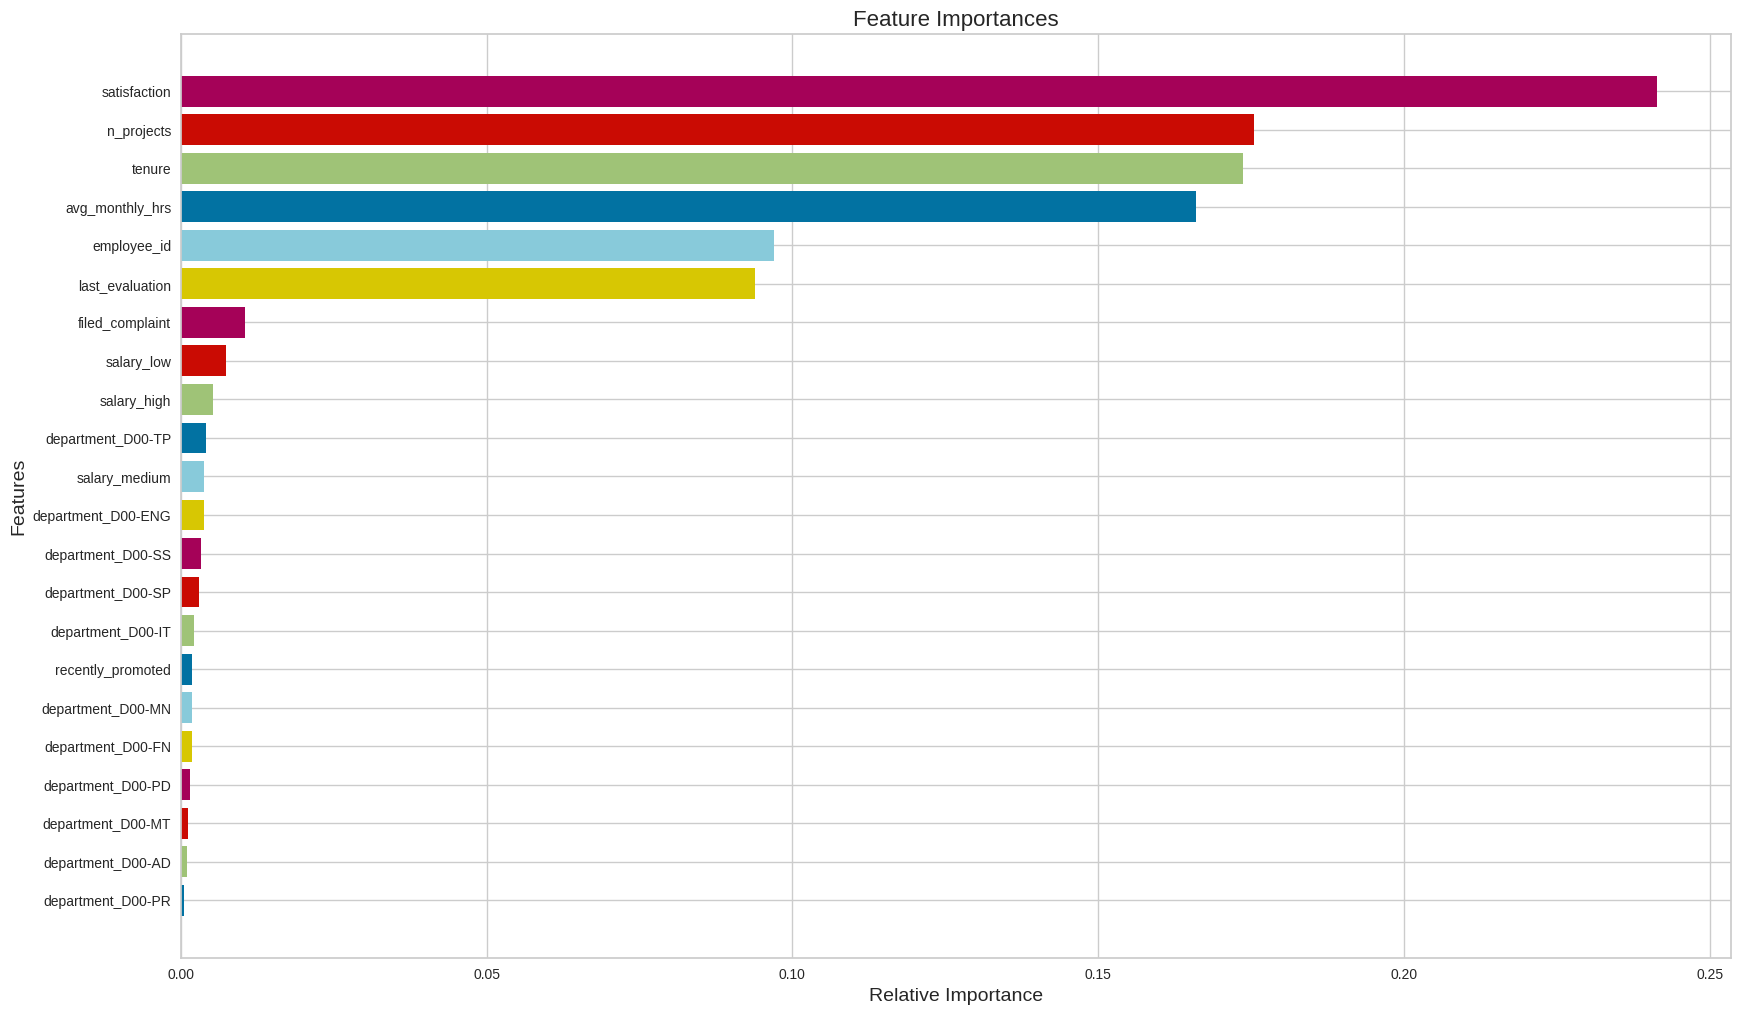

In [ ]:
#sns.set(font_scale=1.0)
figure = plt.figure(figsize = [20, 12])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(x, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

In [ ]:
fea_sel_x1 = train[selected_feat]
fea_sel_y1 = train['status']

In [ ]:
fea_sel_x1

avg_monthly_hrs  last_evaluation  n_projects  satisfaction  tenure  \
0                  246         0.866838           6      0.134415       4   
1                  156         0.474082           2      0.405101       3   
2                  146         0.507349           2      0.434845       3   
3                  281         0.907965           6      0.105749       4   
4                  269         0.959077           4      0.960757       5   
...                ...              ...         ...           ...     ...   
14111              122         0.907114           2      0.755297       4   
14112               49         0.916496           2      0.719638       3   
14113               97         0.514723           1      0.767568       3   
14114              132         0.711681           2      0.625086       5   
14115              116         0.754973           2      0.816925       3   

       employee_id  
0           124467  
1           126150  
2           113707  
3           122394  
4           126860  
...            ...  
14111       111990  
14112       148021  
14113       116171  
14114       106482  
14115       105231  

[14116 rows x 6 columns]

In [ ]:
fea_sel_y1

0        1
1        1
2        1
3        1
4        1
        ..
14111    0
14112    0
14113    0
14114    1
14115    0
Name: status, Length: 14116, dtype: int64

In [ ]:
fsx_train1, fsx_test1, fsy_train1, fsy_test1 = train_test_split(fea_sel_x1, fea_sel_y1, test_size=0.2, random_state = 123)

In [ ]:
print(fsx_train1.shape)
print(fsx_test1.shape)
print(fsy_train1.shape)
print(fsy_test1.shape)

(11292, 6)
(2824, 6)
(11292,)
(2824,)


In [ ]:
rf = RandomForestClassifier(verbose = 2)
rf.fit(fsx_train1, fsy_train1)
preds_rf_train = rf.predict(fsx_train1)
preds_rf_test = rf.predict(fsx_test1)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.7s


building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [ ]:
model_eval(fsy_train1, preds_rf_train)

The Accuracy of the model is:  1.0
class_rep is:
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8576
           1       1.00      1.00      1.00      2716

    accuracy                           1.00     11292
   macro avg       1.00      1.00      1.00     11292
weighted avg       1.00      1.00      1.00     11292

conf_matrix is:
 
 [[8576    0]
 [   0 2716]]


In [ ]:
model_eval(fsy_test1, preds_rf_test)

The Accuracy of the model is:  0.98
class_rep is:
 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2185
           1       0.98      0.93      0.95       639

    accuracy                           0.98      2824
   macro avg       0.98      0.96      0.97      2824
weighted avg       0.98      0.98      0.98      2824

conf_matrix is:
 
 [[2172   13]
 [  45  594]]


####**Observations from Random Forest with Feature Selection**
 - Could see slight improvement in RF model with feature importances
 - **Low Bias** and **Low Variance** with **improved False postives** and **False negatives** numbers

<a name = Section94></a>
### **9.4 Adaboost Trial**

In [ ]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
preds_ada_train = ada.predict(x_train)
preds_ada_test = ada.predict(x_test)

In [ ]:
model_eval(y_train, preds_ada_train)

The Accuracy of the model is:  0.95
class_rep is:
 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      8576
           1       0.90      0.87      0.89      2716

    accuracy                           0.95     11292
   macro avg       0.93      0.92      0.92     11292
weighted avg       0.95      0.95      0.95     11292

conf_matrix is:
 
 [[8321  255]
 [ 356 2360]]


In [ ]:
model_eval(y_test, preds_ada_test)

The Accuracy of the model is:  0.93
class_rep is:
 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2185
           1       0.89      0.82      0.85       639

    accuracy                           0.93      2824
   macro avg       0.92      0.89      0.90      2824
weighted avg       0.93      0.93      0.93      2824

conf_matrix is:
 
 [[2119   66]
 [ 118  521]]


####**Observations from Adaboost**
 - Could see wrt Random forest, it has low train accuracy hence a **High bias** and **low variance** as difference b/w test and train accuracy & f1-score are less
 - It is a **under fit** model overall with **High Bias** and **Low Variance**

####**RandomizedsearchCV for Adaboost**

In [ ]:
distributions = {'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1,1,2]}

In [ ]:
type(distributions)

dict

In [ ]:
clf = RandomizedSearchCV(ada, distributions, random_state=123, verbose=2)

In [ ]:
clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  11.7s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  11.7s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  11.3s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  11.1s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  11.6s
[CV] END ..................learning_rate=1, n_estimators=250; total time=   4.4s
[CV] END ..................learning_rate=1, n_estimators=250; total time=   3.7s
[CV] END ..................learning_rate=1, n_estimators=250; total time=   2.5s
[CV] END ..................learning_rate=1, n_estimators=250; total time=   2.5s
[CV] END ..................learning_rate=1, n_estimators=250; total time=   2.5s
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.1s
[CV] END .................learning_rate=0.1, n_e

RandomizedSearchCV(estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 2],
                                        'n_estimators': [10, 50, 250, 1000]},
                   random_state=123, verbose=2)

In [ ]:
print(clf.best_params_)

{'n_estimators': 1000, 'learning_rate': 0.1}


- Decided to go with n_estimators = 250 and learning_rate = 1, after other explorations

In [ ]:
ada = AdaBoostClassifier(n_estimators = 250, learning_rate = 1)
ada.fit(x_train, y_train)
preds_ada_train = ada.predict(x_train)
preds_ada_test = ada.predict(x_test)

In [ ]:
model_eval(y_train, preds_ada_train)

The Accuracy of the model is:  0.95
class_rep is:
 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      8576
           1       0.91      0.89      0.90      2716

    accuracy                           0.95     11292
   macro avg       0.94      0.93      0.94     11292
weighted avg       0.95      0.95      0.95     11292

conf_matrix is:
 
 [[8349  227]
 [ 300 2416]]


In [ ]:
model_eval(y_test, preds_ada_test)

The Accuracy of the model is:  0.94
class_rep is:
 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2185
           1       0.89      0.84      0.86       639

    accuracy                           0.94      2824
   macro avg       0.92      0.90      0.91      2824
weighted avg       0.94      0.94      0.94      2824

conf_matrix is:
 
 [[2121   64]
 [ 104  535]]


####**Observations from Adaboost with hyperparameters**
 - Very little improvement observed wrt without hyperparameter trial

<a name = Section95></a>
### **9.5 Gradientboost Trial**

In [ ]:
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)
preds_gb_train = gb.predict(x_train)
preds_gb_test = gb.predict(x_test)

In [ ]:
model_eval(y_train, preds_gb_train)

The Accuracy of the model is:  0.98
class_rep is:
 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      8576
           1       0.97      0.94      0.95      2716

    accuracy                           0.98     11292
   macro avg       0.97      0.96      0.97     11292
weighted avg       0.98      0.98      0.98     11292

conf_matrix is:
 
 [[8484   92]
 [ 168 2548]]


In [ ]:
model_eval(y_test, preds_gb_test)

The Accuracy of the model is:  0.97
class_rep is:
 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2185
           1       0.94      0.91      0.93       639

    accuracy                           0.97      2824
   macro avg       0.96      0.95      0.95      2824
weighted avg       0.97      0.97      0.97      2824

conf_matrix is:
 
 [[2151   34]
 [  55  584]]


####**Observations from Gradientboost**
 - **Low Bias** and **Low Variance**; however comparatively not great wrt Random forest also in terms of **False negatives** & **False positives**

<a name = Section96></a>
### **9.6 XGboost Trial**

In [ ]:
xgclf=xgb.XGBClassifier()
xgclf.fit(x_train, y_train)
preds_xgclf_train = xgclf.predict(x_train)
preds_xgclf_test = xgclf.predict(x_test)

In [ ]:
model_eval(y_train, preds_xgclf_train)

The Accuracy of the model is:  1.0
class_rep is:
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8576
           1       1.00      0.99      1.00      2716

    accuracy                           1.00     11292
   macro avg       1.00      1.00      1.00     11292
weighted avg       1.00      1.00      1.00     11292

conf_matrix is:
 
 [[8574    2]
 [  22 2694]]


In [ ]:
model_eval(y_test, preds_xgclf_test)

The Accuracy of the model is:  0.98
class_rep is:
 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2185
           1       0.96      0.93      0.95       639

    accuracy                           0.98      2824
   macro avg       0.97      0.96      0.97      2824
weighted avg       0.98      0.98      0.98      2824

conf_matrix is:
 
 [[2162   23]
 [  43  596]]


####**Observations from XGboost**
- **Low bias** model, as it has high train accuracy
- **Low variance** model, as it has low variance (upto 5% difference b/w train and test accuracy, f1-score)
- 43 employees has been marked **False Negative**; actually they left, but model says they are not

#**Overall summary of Various Model Performances**

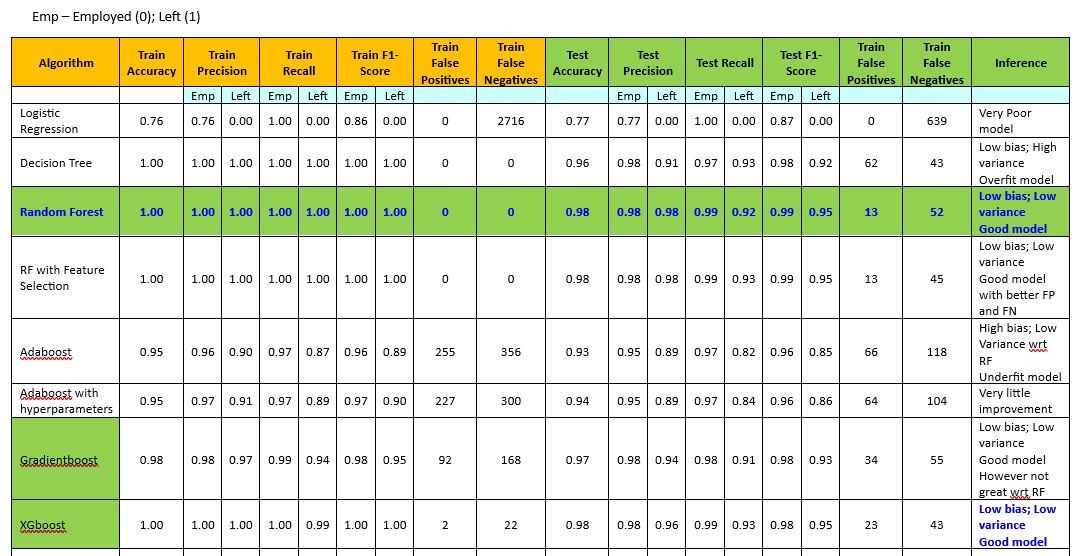

- Random forest could be the first choice, followed by XGboost and Gradientboost based on the evaluation metrics

---
<a name = Section10></a>
# **10. Application on Production Data**
---

In [ ]:
prod_data = pd.read_csv('/content/drive/MyDrive/ML_data/Capstone_GCD_Project_Sep_2023/GCD_Capstone_Project_unseen_data - GCD_Capstone_Project_unseen_data.csv')

In [ ]:
prod_data

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0               134     D00-IT              NaN         0.528841           2   
1               221     D00-PD              NaN         0.784561           2   
2               156     D00-SS              NaN         0.545183           2   
3               133     D00-PR              NaN              NaN           4   
4               135     D00-SS              NaN         0.454637           2   
..              ...        ...              ...              ...         ...   
95              261     D00-SS              NaN         0.748131           4   
96              231     D00-PD              1.0         0.663618           3   
97              162    D00-ENG              1.0         0.509361           4   
98              209    D00-ENG              NaN         0.565951           3   
99              189     D00-IT              NaN         0.949345           3   

    recently_promoted  salary  satisfaction  tenure  employee_id  
0                 NaN     low      0.400464     3.0       119045  
1                 NaN     low      0.759513     3.0       112223  
2                 NaN  medium      0.336457     3.0       103924  
3                 NaN  medium      0.832039     2.0       105922  
4                 NaN     low      0.320723     5.0       103297  
..                ...     ...           ...     ...          ...  
95                NaN    high      0.762597     3.0       116666  
96                NaN     low      0.660827     2.0       106422  
97                NaN     low      0.885543     3.0       107889  
98                NaN     low      0.601487     3.0       117622  
99                NaN     low      0.856973     6.0       108058  

[100 rows x 10 columns]

In [ ]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         98 non-null     object 
 2   filed_complaint    15 non-null     float64
 3   last_evaluation    83 non-null     float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  3 non-null      float64
 6   salary             100 non-null    object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


##**Handling Data inconsistencies**

In [ ]:
prod_data

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
0               134     D00-IT              NaN         0.528841           2   
1               221     D00-PD              NaN         0.784561           2   
2               156     D00-SS              NaN         0.545183           2   
3               133     D00-PR              NaN              NaN           4   
4               135     D00-SS              NaN         0.454637           2   
..              ...        ...              ...              ...         ...   
95              261     D00-SS              NaN         0.748131           4   
96              231     D00-PD              1.0         0.663618           3   
97              162    D00-ENG              1.0         0.509361           4   
98              209    D00-ENG              NaN         0.565951           3   
99              189     D00-IT              NaN         0.949345           3   

    recently_promoted  salary  satisfaction  tenure  employee_id  
0                 NaN     low      0.400464     3.0       119045  
1                 NaN     low      0.759513     3.0       112223  
2                 NaN  medium      0.336457     3.0       103924  
3                 NaN  medium      0.832039     2.0       105922  
4                 NaN     low      0.320723     5.0       103297  
..                ...     ...           ...     ...          ...  
95                NaN    high      0.762597     3.0       116666  
96                NaN     low      0.660827     2.0       106422  
97                NaN     low      0.885543     3.0       107889  
98                NaN     low      0.601487     3.0       117622  
99                NaN     low      0.856973     6.0       108058  

[100 rows x 10 columns]

In [ ]:
prod_data['filed_complaint'] = np.where(prod_data['filed_complaint'].isna(),0.0,prod_data['filed_complaint'])

In [ ]:
prod_data['recently_promoted'] = np.where(prod_data['recently_promoted'].isna(),0.0,prod_data['recently_promoted'])

In [ ]:
prod_data.duplicated().sum()

0

In [ ]:
prod_data['department'].value_counts()

D00-SS     27
D00-ENG    17
D00-SP     13
D00-IT      9
D00-PD      7
D00-MT      7
D00-FN      6
D00-MN      5
D00-TP      3
-IT         2
D00-PR      1
D00-AD      1
Name: department, dtype: int64

In [ ]:
prod_data['department'].replace('-IT','D00-IT', inplace=True)

In [ ]:
random_cat(prod_data['department'])
random_cat(prod_data['last_evaluation'])

<ipython-input-65-b8943bba0c8e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column.isnull()] = random_categories
<ipython-input-65-b8943bba0c8e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column.isnull()] = random_categories


0     0.528841
1     0.784561
2     0.545183
3     0.946715
4     0.454637
        ...   
95    0.748131
96    0.663618
97    0.509361
98    0.565951
99    0.949345
Name: last_evaluation, Length: 100, dtype: float64

In [ ]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         100 non-null    object 
 2   filed_complaint    100 non-null    float64
 3   last_evaluation    100 non-null    float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  100 non-null    float64
 6   salary             100 non-null    object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


In [ ]:
prod_data['satisfaction'].value_counts().sort_index()

0.051515    1
0.055583    1
0.078206    1
0.115586    1
0.116054    1
           ..
0.949086    1
0.952402    1
0.975775    1
0.991581    1
1.000000    3
Name: satisfaction, Length: 95, dtype: int64

In [ ]:
random_cat(prod_data['satisfaction'])
random_cat(prod_data['tenure'])

<ipython-input-65-b8943bba0c8e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column.isnull()] = random_categories
<ipython-input-65-b8943bba0c8e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column.isnull()] = random_categories


0     3.0
1     3.0
2     3.0
3     2.0
4     5.0
     ... 
95    3.0
96    2.0
97    3.0
98    3.0
99    6.0
Name: tenure, Length: 100, dtype: float64

In [ ]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         100 non-null    object 
 2   filed_complaint    100 non-null    float64
 3   last_evaluation    100 non-null    float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  100 non-null    float64
 6   salary             100 non-null    object 
 7   satisfaction       100 non-null    float64
 8   tenure             100 non-null    float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


In [ ]:
prod_data['avg_monthly_hrs'].unique()

array([134, 221, 156, 133, 135, 157, 153, 264, 179, 169, 115, 258, 129,
       176, 237, 225, 204, 158, 224, 127, 104, 101, 151, 265, 232, 139,
       241, 254, 165, 189, 227, 218, 164, 263, 249, 247, 289, 240, 250,
       166, 196, 194, 272, 267, 217, 206, 273, 261, 150, 275, 132, 149,
       159, 285, 255, 251, 212, 243, 140, 269, 147, 155, 234, 252, 109,
       278, 143, 188, 245, 190, 268, 173, 253, 128,  68, 274, 223, 231,
       162, 209])

In [ ]:
prod_data['avg_monthly_hrs'] = prod_data['avg_monthly_hrs'].astype('int')
prod_data['filed_complaint'] = prod_data['filed_complaint'].astype('int')
prod_data['recently_promoted'] = prod_data['recently_promoted'].astype('int')
prod_data['tenure'] = prod_data['tenure'].astype('int')

In [ ]:
new1=prod_data[prod_data['department'].str.contains('D00-TP')]

In [ ]:
new1

avg_monthly_hrs department  filed_complaint  last_evaluation  n_projects  \
22              104     D00-TP                1         0.820227           2   
60              132     D00-TP                1         0.784561           2   
92               68     D00-TP                0         0.829800           1   

    recently_promoted salary  satisfaction  tenure  employee_id  
22                  0    low      0.949086       3       102113  
60                  0    low      0.952402       3       102998  
92                  0    low      0.900620       3       114160

In [ ]:
prod_data['employee_id'].nunique()

100

In [ ]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         100 non-null    object 
 2   filed_complaint    100 non-null    int64  
 3   last_evaluation    100 non-null    float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  100 non-null    int64  
 6   salary             100 non-null    object 
 7   satisfaction       100 non-null    float64
 8   tenure             100 non-null    int64  
 9   employee_id        100 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 7.9+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_monthly_hrs     14116 non-null  int64  
 1   filed_complaint     14116 non-null  int64  
 2   last_evaluation     14116 non-null  float64
 3   n_projects          14116 non-null  int64  
 4   recently_promoted   14116 non-null  int64  
 5   satisfaction        14116 non-null  float64
 6   status              14116 non-null  int64  
 7   tenure              14116 non-null  int64  
 8   employee_id         14116 non-null  int64  
 9   department_D00-AD   14116 non-null  uint8  
 10  department_D00-ENG  14116 non-null  uint8  
 11  department_D00-FN   14116 non-null  uint8  
 12  department_D00-IT   14116 non-null  uint8  
 13  department_D00-MN   14116 non-null  uint8  
 14  department_D00-MT   14116 non-null  uint8  
 15  department_D00-PD   14116 non-null  uint8  
 16  depa

In [ ]:
prod_data1 = prod_data.copy()

In [ ]:
prod_data1 = pd.get_dummies(prod_data1, columns = ['department', 'salary'])

In [ ]:
prod_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_monthly_hrs     100 non-null    int64  
 1   filed_complaint     100 non-null    int64  
 2   last_evaluation     100 non-null    float64
 3   n_projects          100 non-null    int64  
 4   recently_promoted   100 non-null    int64  
 5   satisfaction        100 non-null    float64
 6   tenure              100 non-null    int64  
 7   employee_id         100 non-null    int64  
 8   department_D00-AD   100 non-null    uint8  
 9   department_D00-ENG  100 non-null    uint8  
 10  department_D00-FN   100 non-null    uint8  
 11  department_D00-IT   100 non-null    uint8  
 12  department_D00-MN   100 non-null    uint8  
 13  department_D00-MT   100 non-null    uint8  
 14  department_D00-PD   100 non-null    uint8  
 15  department_D00-PR   100 non-null    uint8  
 16  departmen

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_monthly_hrs     14116 non-null  int64  
 1   filed_complaint     14116 non-null  int64  
 2   last_evaluation     14116 non-null  float64
 3   n_projects          14116 non-null  int64  
 4   recently_promoted   14116 non-null  int64  
 5   satisfaction        14116 non-null  float64
 6   tenure              14116 non-null  int64  
 7   employee_id         14116 non-null  int64  
 8   department_D00-AD   14116 non-null  uint8  
 9   department_D00-ENG  14116 non-null  uint8  
 10  department_D00-FN   14116 non-null  uint8  
 11  department_D00-IT   14116 non-null  uint8  
 12  department_D00-MN   14116 non-null  uint8  
 13  department_D00-MT   14116 non-null  uint8  
 14  department_D00-PD   14116 non-null  uint8  
 15  department_D00-PR   14116 non-null  uint8  
 16  depa

##**Prediction using Random Forest**

In [ ]:
rf = RandomForestClassifier(verbose = 2)
rf.fit(x_train, y_train)
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.6s


building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [ ]:
model_eval(y_train, preds_rf_train)

The Accuracy of the model is:  1.0
class_rep is:
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8576
           1       1.00      1.00      1.00      2716

    accuracy                           1.00     11292
   macro avg       1.00      1.00      1.00     11292
weighted avg       1.00      1.00      1.00     11292

conf_matrix is:
 
 [[8576    0]
 [   0 2716]]


In [ ]:
model_eval(y_test, preds_rf_test)

The Accuracy of the model is:  0.98
class_rep is:
 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2185
           1       0.98      0.92      0.95       639

    accuracy                           0.98      2824
   macro avg       0.98      0.96      0.97      2824
weighted avg       0.98      0.98      0.98      2824

conf_matrix is:
 
 [[2172   13]
 [  52  587]]


In [ ]:
prediction = rf.predict(prod_data1)
prediction

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
len(prediction)

100

In [ ]:
preds_proba_production = rf.predict_proba(prod_data1)
preds_proba_production

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


array([[0.  , 1.  ],
       [0.85, 0.15],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.54, 0.46],
       [0.99, 0.01],
       [0.94, 0.06],
       [0.97, 0.03],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.94, 0.06],
       [0.01, 0.99],
       [0.17, 0.83],
       [1.  , 0.  ],
       [0.96, 0.04],
       [0.99, 0.01],
       [0.01, 0.99],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04],
       [0.06, 0.94],
       [0.05, 0.95],
       [0.97, 0.03],
       [0.98, 0.02],
       [0.42, 0.58],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.98, 0.02],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.91, 0.09],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.12, 0.88],
       [0.25, 0.75],
       [1.  , 0.  ],
       [0.92, 0.08],
       [1.  , 0.  ],
       [0.93, 0.07],
       [0.04, 0.96],
       [1.  ,

In [ ]:
preds_proba_production.shape

(100, 2)

In [ ]:
proba_left = preds_proba_production[ :,1]

In [ ]:
proba_left

array([1.  , 0.15, 1.  , 0.  , 0.46, 0.01, 0.06, 0.03, 0.01, 0.02, 0.06,
       0.99, 0.83, 0.  , 0.04, 0.01, 0.99, 0.01, 0.  , 0.04, 0.94, 0.95,
       0.03, 0.02, 0.58, 0.  , 0.  , 0.  , 1.  , 0.02, 0.02, 0.  , 0.  ,
       0.09, 0.  , 0.  , 0.01, 1.  , 0.01, 0.  , 0.88, 0.75, 0.  , 0.08,
       0.  , 0.07, 0.96, 0.  , 0.01, 0.  , 0.01, 0.01, 0.02, 0.01, 0.05,
       0.  , 0.04, 0.02, 0.08, 0.92, 0.04, 0.89, 0.82, 0.  , 0.99, 0.62,
       0.  , 1.  , 0.01, 0.89, 0.1 , 0.02, 0.  , 0.1 , 0.86, 0.53, 0.01,
       0.01, 0.15, 0.01, 0.8 , 0.98, 0.14, 0.86, 0.02, 0.  , 0.  , 0.23,
       0.1 , 0.03, 0.96, 0.98, 0.14, 0.9 , 0.59, 0.  , 0.  , 0.01, 0.  ,
       0.14])

In [ ]:
proba_left.shape

(100,)

In [ ]:
submission = pd.DataFrame(prod_data1['employee_id'])
submission_proba = pd.DataFrame(prod_data1['employee_id'])

In [ ]:
submission

employee_id
0        119045
1        112223
2        103924
3        105922
4        103297
..          ...
95       116666
96       106422
97       107889
98       117622
99       108058

[100 rows x 1 columns]

In [ ]:
submission_proba

employee_id
0        119045
1        112223
2        103924
3        105922
4        103297
..          ...
95       116666
96       106422
97       107889
98       117622
99       108058

[100 rows x 1 columns]

In [ ]:
submission['status'] = rf.predict(prod_data1)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [ ]:
submission_proba['status'] = proba_left

In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   employee_id  100 non-null    int64
 1   status       100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [ ]:
submission_proba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee_id  100 non-null    int64  
 1   status       100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [ ]:
submission

employee_id  status
0        119045       1
1        112223       0
2        103924       1
3        105922       0
4        103297       0
..          ...     ...
95       116666       0
96       106422       0
97       107889       0
98       117622       0
99       108058       0

[100 rows x 2 columns]

In [ ]:
submission_proba

employee_id  status
0        119045    1.00
1        112223    0.15
2        103924    1.00
3        105922    0.00
4        103297    0.46
..          ...     ...
95       116666    0.00
96       106422    0.00
97       107889    0.01
98       117622    0.00
99       108058    0.14

[100 rows x 2 columns]

In [ ]:
submission.to_csv('HR_advisories_Project_Group_1009.csv')

In [ ]:
submission_proba.to_csv('HR_advisories_Project_Group_proba_1009.csv')